# Gaming market trends

---

## Table of Contents

2. [Introduction](#introduction)  
3. [Loading Libraries and Dataset](#loading-libraries-and-dataset)  
4. [Initial Data Exploration](#initial-data-exploration)  
   4.1 [Dataset Overview](#dataset-overview)  
   4.2 [Missing Values and Duplicates Overview](#missing-values-and-duplicates-overview)  
   4.3 [Initial Analysis Results](#initial-analysis-results)  
5. [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)  
   5.1 [Standardizing Column Names and Values](#standardizing-column-names-and-values)  
   5.2 [A Deep Analysis on `user_score` Column](#a-deep-analysis-on-user_score-column)  
   5.3 [Handling Missing Values](#handling-missing-values)  
6. [Data Enrichment](#data-enrichment)  
7. [Exploratory Analysis](#exploratory-analysis)  
   7.1 [Release Year and Platform Analysis](#release-year-and-platform-analysis)  
   7.2 [Analysis of Recent Years and Modern Platforms](#analysis-of-recent-years-and-modern-platforms)  
   7.3 [Analysis of Games and Platforms](#analysis-of-games-and-platforms)  
   7.4 [Correlation Analysis: Sales, User Ratings, and Critic Ratings](#correlation-analysis-sales-user-ratings-and-critic-ratings)  
   7.5 [Different Genre Analysis](#different-genre-analysis)  
   7.6 [Different Regional Profiles](#different-regional-profiles)  
8. [Hypothesis Testing](#hypothesis-testing)  
   8.1 [Are Xbox One and PC User Ratings Equal?](#are-xbox-one-and-pc-user-ratings-equal)  
   8.2 [Are Action and Sport Genres User Ratings Different?](#are-action-and-sport-genres-user-ratings-different)  
9. [Conclusion](#conclusion)


---

## Introduction


This is a market analysis project for Ice, a global online video game retailer. The goal is to uncover patterns that determine whether a game is likely to succeed, using data sources that include **user and critic reviews**, **genres**, **platforms** (like Xbox or PlayStation), and **historical sales figures**.

To simulate a real-world scenario, I’m assuming it’s December 2016 and I’m preparing a marketing campaign for the year 2017. The dataset I’m using includes information up to 2016. While the actual prediction year isn’t critical, the main goal is to gain experience working with historical data to **forecast future trends**.

One of the features in the dataset is the ESRB rating, provided by the Entertainment Software Rating Board. This rating indicates the appropriate age group for each game, such as "Teen" or "Mature."

---

## Loading libraries and dataset

Libraries to be used in the project.

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading the dataset.

In [2]:
try:
    url = "https://raw.githubusercontent.com/gabriel-amoroso/bootcamp_dataanalysis/refs/heads/main/games_sales_trends/games.csv"
    games_data = pd.read_csv(url)
    print("Dataset loaded from GitHub.")
except:
    games_data = pd.read_csv("games.csv")
    print("Dataset loaded from local file.")

Dataset loaded from GitHub.


---

## Initial data exploration

### Dataset overview

To begin, I’ll explore the dataset to understand its structure and content. This includes:

- Checking which columns are available and what they represent

- Looking for missing values

- Detecting duplicate records

- Identifying the data types for each column

Once I’ve completed this initial inspection, I’ll proceed with any necessary cleaning and preprocessing steps.

First, let's check the dataset and understand each column.

In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Description of each column in the dataset:

- **Name**: Title of the game  
- **Year_Of_Release**: Year the game was released  
- **Genre**: Genre of the game (e.g., Action, RPG, Sports)  
- **NA_sales**: Sales in North America (in millions of USD)  
- **EU_sales**: Sales in Europe (in millions of USD)  
- **JP_sales**: Sales in Japan (in millions of USD)  
- **Other_sales**: Sales in other regions (in millions of USD)  
- **Critic_Score**: Average critic rating (out of 100)  
- **User_Score**: Average user rating (out of 10)  
- **Rating**: ESRB age rating (e.g., E for Everyone, M for Mature)


Checking a slice of the dataset:

In [4]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Missing values and duplicates overview

Checking missing values and duplicates:

In [5]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
games_data.duplicated().sum()

0

### Initial analysis results

Here’s what I observed in my first pass through the dataset:

1. **Column Naming**:  
   All column names are written in uppercase letters. This isn’t ideal for readability or consistency, so I’ll convert all of them to lowercase.

2. **Data Types**:
   - **`year_of_release`**: This column represents a year. Since we’re only dealing with the year (and not full dates), I’ll convert it to an integer type. A conversion to `datetime` would only be necessary if full date information were available.
   - **`user_score`**: This column should contain numeric ratings, usually with decimal points. Therefore, it should be stored as a float.

   - **Importante note**: Since we’ve already identified the presence of missing values, directly converting the data types would cause errors. To handle this, I’ll use a method that converts the values while preserving missing entries as `NaN`.

3. **Missing Values**:  
   Several columns, particularly those related to game scores, contain missing values. I’ll take a closer look at these rows and decide whether to fill or remove them based on their relevance. Since our goal is to identify what contributes to a game's success, it’s important to retain reliable values for the variables that may influence a game’s performance.


---

## Data cleaning and preprocessing

### Standardizing columns names and values

First, I’ll convert all column names to lowercase to improve readability and maintain consistency throughout the analysis.

In [7]:
games_data = games_data.rename(columns = str.lower)
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Next, I’ll update the data types for two specific columns:

- `year_of_release` will be converted to an integer, since we're only working with the release year.
- `user_score` will be converted to a float, as user ratings may contain decimal values.

Missing values will be handled appropriately during this conversion to avoid errors.

In [8]:
games_data.fillna({'year_of_release':0}, inplace=True)
games_data['year_of_release'] = games_data['year_of_release'].astype(int)

games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
games_data['user_score'] = games_data['user_score'].astype(float)

games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [9]:
games_data['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

In [10]:
games_data['user_score'].isna().sum()

9125

### A deep analysis on `user_score` column

Some columns contained missing or incompatible values that initially prevented data type conversion. To address this, I made two adjustments:

- For the **`year_of_release`** column, I replaced all missing values with `0`. Since the release year is a very specific attribute of each game, it wouldn’t make sense to fill in missing values with the mean or median. Using `0` as a neutral placeholder allows us to keep track of unknown years without making assumptions.

- For the **`user_score`** column, I converted all values to numeric, which replaces invalid entries with `NaN`. This allows for conversion to float and further analysis.  
  Interestingly, the original column had **10,014 non-null entries**, but after conversion, only **7,590** remained. This means **2,424 values were not numeric** and were turned into `NaN`. To investigate, I’ll create an auxiliary DataFrame using the original `games.csv` file to identify which values caused the issue.


In [11]:
try:
    url = "https://raw.githubusercontent.com/gabriel-amoroso/bootcamp_dataanalysis/refs/heads/main/games_sales_trends/games.csv"
    games_data_original = pd.read_csv(url)
    print("Dataset loaded from GitHub.")
except:
    games_data_original = pd.read_csv("games.csv")
    print("Dataset loaded from local file.")

Dataset loaded from GitHub.


In [12]:
games_data_aux = pd.DataFrame({'user_score_before': games_data_original['User_Score'],
                               'user_score_after': games_data['user_score']})
                               
games_data_aux[games_data_aux['user_score_before'].notnull() & games_data_aux['user_score_after'].isna()]

,user_score_before,user_score_after
119,tbd,NaN
301,tbd,NaN
520,tbd,NaN
645,tbd,NaN
657,tbd,NaN
...,...,...
16695,tbd,NaN
16697,tbd,NaN
16698,tbd,NaN
16704,tbd,NaN


All 2,424 non-numeric values in the `user_score` column were labeled as `'tbd'`, which stands for "to be determined." This typically indicates that the game had not received enough user ratings at the time the data was collected.

To better understand the context of these `'tbd'` entries, I’ll check the **release years** of these games using the original dataset. This will help me determine whether these are recently released games (which would justify the lack of user scores) or if they represent a broader issue of missing feedback.


In [13]:
games_data_original.loc[games_data_original['User_Score'] == 'tbd'].sort_values(by='Year_of_Release', ascending=False).head(100)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15142,Rugby Challenge 3,X360,2016.0,Sports,0.00,0.02,0.00,0.00,NaN,tbd,E
9805,Destiny: The Collection,XOne,2016.0,Shooter,0.05,0.06,0.00,0.01,NaN,tbd,T
13436,Just Dance 2017,PS3,2016.0,Misc,0.01,0.03,0.00,0.01,NaN,tbd,E10+
16267,The Book of Unwritten Tales 2,WiiU,2016.0,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,T
16248,Azure Striker Gunvolt: Striker Pack,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,tbd,T
...,...,...,...,...,...,...,...,...,...,...,...
12295,Moshi Monsters: Katsuma Unleashed,3DS,2013.0,Action,0.03,0.03,0.00,0.01,NaN,tbd,E
16301,Caladrius,X360,2013.0,Shooter,0.00,0.00,0.01,0.00,NaN,tbd,T
14353,Turbo: Super Stunt Squad,DS,2013.0,Sports,0.00,0.03,0.00,0.00,NaN,tbd,E
15798,Monster High 13 Wishes,3DS,2013.0,Action,0.00,0.02,0.00,0.00,NaN,tbd,E


Out of the 2,424 'tbd' entries in the `user_score` column, I sorted them in descending order by `year_of_release` to inspect the most recent games. The top 100 were released between **2013 and 2016**, which means the majority of these games are **not recent** and still lack user ratings.

This suggests that the absence of ratings is not solely due to recent releases. Therefore, replacing `'tbd'` with `NaN` likely wouldn't bias our analysis toward newer games. However, to ensure **full traceability** and avoid potential issues later when filtering or aggregating, I decided to replace all `'tbd'` values with **`-1`**.

This allows us to:
- Maintain the column as a float type
- Distinguish these entries from truly missing (`NaN`) values
- Easily identify and filter them if needed during later stages of analysis


After reviewing the impact of converting 'tbd' values and considering how to best manage missing or undefined user scores, I decided to revert the `user_score` column to its original format. This allows me to reapply the transformation more cleanly and deliberately in the next step, now that I’ve fully assessed the structure and meaning of the data.

In [14]:
games_data['user_score'] = games_data_original['User_Score'].copy()
games_data['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [15]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [16]:
games_data['user_score'] = games_data['user_score'].replace('tbd', -1)
games_data['user_score'] = games_data['user_score'].astype(float)
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [17]:
games_data['user_score'].value_counts()

user_score
-1.0    2424
 7.8     324
 8.0     290
 8.2     282
 8.3     254
        ... 
 1.1       2
 1.9       2
 9.6       2
 0.0       1
 9.7       1
Name: count, Length: 96, dtype: int64

With these changes, the entire `user_score` column has been successfully converted to `float`, and all 2,424 previously non-numeric 'tbd' values have been replaced with '-1'. This keeps them easy to track and analyze later without compromising the numerical integrity of the column.

Now that the transformation is complete, I’ll return to working directly with the cleaned and structured DataFrame: `games_data`.


### Handling missing values

Now that the necessary data type conversions are complete, all columns appear to have appropriate types for analysis. The next step is to address the **missing values** present in the dataset. I’ll review which columns still contain `NaN` values and decide how best to adress them, based on their importance and the context of the data.

In [18]:
games_data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [19]:
games_data[games_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are two rows in the dataset where the **game title is missing**. These same rows are also missing values in other important columns such as `genre`, `user_score`, `critic_score`, and `rating`.

Since the title is a fundamental piece of information and these rows contain multiple missing fields, there isn’t much useful analysis that can be done with them. Removing these two entries won't have any significant impact on the dataset as a whole. 

In [20]:
games_data = games_data.dropna(subset=['name'])
games_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Next, I will be handling missing values in the columns related to **game scores** and **age ratings** (`user_score`, `critic_score`, and `rating`). Since our goal is to evaluate how much these scores and classifications influence **game sales across different platforms**, it's important to handle these missing values thoughtfully.

In fact, the absence of scores may be informative in itself. For example, a lack of user or critic ratings could indicate that a game received little attention or low engagement, which may correlate with lower sales. Based on this reasoning, I’ve decided to explore multiple scenarios:

- **Scenario 1 — Keep the missing values:**  
  I’ll start by preserving all missing data in these columns. This allows me to assess the performance of games that received **no ratings at all**. If these games show significantly different sales patterns, that might suggest the presence (or absence) of ratings plays a role in sales performance.

- **Scenario 2 — Group-based analysis:**  
  Depending on the findings from the first scenario, I may further investigate by grouping games according to franchise, platform, or other relevant attributes. This could reveal whether missing ratings are more common in certain categories and how that relates to commercial success.

This approach should help determine whether missing ratings are just noise or actually carry meaningful signals about a game's success.


---

## Data enrichment

To better assess the total profit generated by each game, I’ll create a new column that aggregates sales across all regions. This column will represent the **total global sales** by summing the values from:

- `NA_sales` (North America)
- `EU_sales` (Europe)
- `JP_sales` (Japan)
- `Other_sales` (all other regions)

In [21]:
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Earlier, I confirmed that the 'tbd' values in the `user_score` column (now replaced with -1) were **not concentrated among the most recent releases**. This suggests that these games never received user ratings, possibly due to low visibility or relevance.

Now, I want to verify whether there's a **relationship between the lack of user ratings and total sales performance**. Specifically, I’ll check if games with a `user_score` of -1, which indicates a missing score, tend to have lower global sales compared to rated games.

This will help determine whether the absence of scores reflects a lack of popularity or commercial impact.


In [22]:
games_data[games_data['user_score'] == -1].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,-1.0,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,-1.0,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,-1.0,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,-1.0,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,-1.0,E,2.40


In [23]:
games_data[(games_data['user_score'] == -1) & (games_data['total_sales'] > games_data['total_sales'].mean())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,-1.0,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,-1.0,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,-1.0,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,-1.0,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,-1.0,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,ZhuZhu Pets 2: Featuring The Wild Bunch,DS,2010,Simulation,0.40,0.10,0.0,0.04,NaN,-1.0,E,0.54
3689,Are You Smarter than a 5th Grader? Make the Grade,Wii,2008,Misc,0.50,0.00,0.0,0.04,NaN,-1.0,E,0.54
3730,Phineas and Ferb: Across the 2nd Dimension,DS,2011,Action,0.31,0.18,0.0,0.05,47.0,-1.0,E,0.54
3731,50 Classic Games,DS,2009,Misc,0.50,0.00,0.0,0.04,NaN,-1.0,E,0.54


Among the 2,424 games that had 'tbd' as their user score (now marked as -1), only **165** had total sales above the dataset’s average. This represents roughly **7%** of the unrated games.

This suggests a clear trend: games that **don’t receive user scores are typically low-sellers**. It’s reasonable to assume that a minimum number of user ratings may be required before a score is officially published. Games that fail to reach this threshold — often due to poor sales — remain labeled as 'tbd'.

Therefore, it seems plausible that the presence of 'tbd' is not arbitrary, but instead reflects **insufficient engagement or visibility**, which itself may be a consequence of underwhelming commercial performance.

After that conclusion, it's safe to change every '-1' value in `user_score` into NaN, so it won't interfere in our further analysis.

In [24]:
print(f'We have {(games_data['user_score'] == -1).sum()} -1 values')
print(f'We have {games_data['user_score'].isna().sum()} NaN values')

We have 2424 -1 values
We have 6699 NaN values


In [25]:
games_data['user_score'] = games_data['user_score'].replace(-1, np.nan)
games_data['user_score'].isna().sum()

9123

---

## Exploratory analysis

At this stage, I’ll begin exploring the dataset in greater depth to uncover patterns and relationships.

The goal is to analyze multiple parameters to draw meaningful conclusions, including:

- Trends in game releases over the years
- Sales performance across different platforms
- Identification of top-selling games
- Visual exploration of key insights

Throughout this process, I’ll support the findings with visualizations and interpretations to provide a clearer understanding of the data and its implications.


### Release year and platform analysis

To start the exploratory phase, I’ll look into the **number of games released each year**. This will help identify trends in the gaming industry over.

This initial step will set the stage for later comparisons involving platforms and sales performance.


In [26]:
games_data.groupby('year_of_release')['name'].count().reset_index()

,year_of_release,name
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


The number of game releases grew exponentially, especially starting in 1994. Interestingly, there was a notable decline after 2012: in 2013, only 544 games were released, which is less than half the number from 2011 (1,136 games). From 2013 to 2016, the release volume remained relatively stable without significant recovery.

This drop may reflect a technological leap in the industry: game development became more complex and resource-intensive, possibly leading to fewer but more sophisticated titles being released.

Additionally, there are 269 games recorded with 0 as their release year, which we previously used to flag missing values. I’ll now check:
- How many **platforms** are represented in the dataset
- Which platforms these **undated games** belong to

This will help determine whether certain platforms are more prone to missing release year information.

In [27]:
games_data['platform'].value_counts()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [28]:
games_data[games_data['year_of_release'] == 0].groupby('platform')['name'].count().reset_index()

,platform,name
0,2600,17
1,3DS,8
2,DS,30
3,GB,1
4,GBA,11
5,GC,14
6,N64,3
7,PC,17
8,PS,7
9,PS2,34


There isn’t a clear pattern regarding the platforms involved, so we can rule out the possibility that the missing release years are tied to a specific console or platform. Since the list includes both older and newer platforms, it’s likely that the missing data is simply due to registration issues.

If needed, I’ll revisit this later for deeper investigation.

Now, let’s check which platform had the highest total game sales.

In [29]:
games_data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


We’ve identified the platforms with the highest total sales volume. However, it’s important to keep in mind that **console lifecycles vary**: some platforms are discontinued over time, while others remain active for longer periods. Additionally, newer platforms haven’t been on the market as long and therefore haven’t had the same time to accumulate sales.

To account for this, I’ll break down **sales by platform and year**. This will help us visualize the **lifespan and evolution of each console** and better contextualize their total sales. I’ll create a pivot table to display these values clearly.


In [30]:
games_data_pivot = pd.pivot_table(games_data[games_data['year_of_release'] != 0], 
                                  values = 'total_sales', 
                                  index = 'platform', 
                                  columns = 'year_of_release',
                                  aggfunc = 'sum',
                                  fill_value = 0)
games_data_pivot.iloc[:, 0:20]

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
platform,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.08,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.38,5.16
DS,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,0.00,12.18,3.60,36.03,6.37,26.90,38.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.60,4.33,12.64,0.65,8.13,0.00,0.00,0.00,0.00,0.00


In [31]:
games_data_pivot.iloc[:, 20:]

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,
2600,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DC,5.99,1.07,0.29,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DS,0.00,0.00,0.00,0.00,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,19.76,9.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,26.34,51.81,50.61,28.82,27.62,11.26,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GEN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


From this pivot table, we can clearly identify the starting points of various platforms and also observe the decline of others. For example, we can pinpoint the launch of the *PlayStation 4*, as its sales begin around 2014 in the data.

Understanding the **average lifespan of a platform** is crucial to interpreting long-term sales patterns. To do this, I’ll generate visualizations that show sales trends for different platforms over time. By breaking this down into specific periods, we can more easily detect the rise and fall of each console, making it easier to compare their trajectories and market impact.


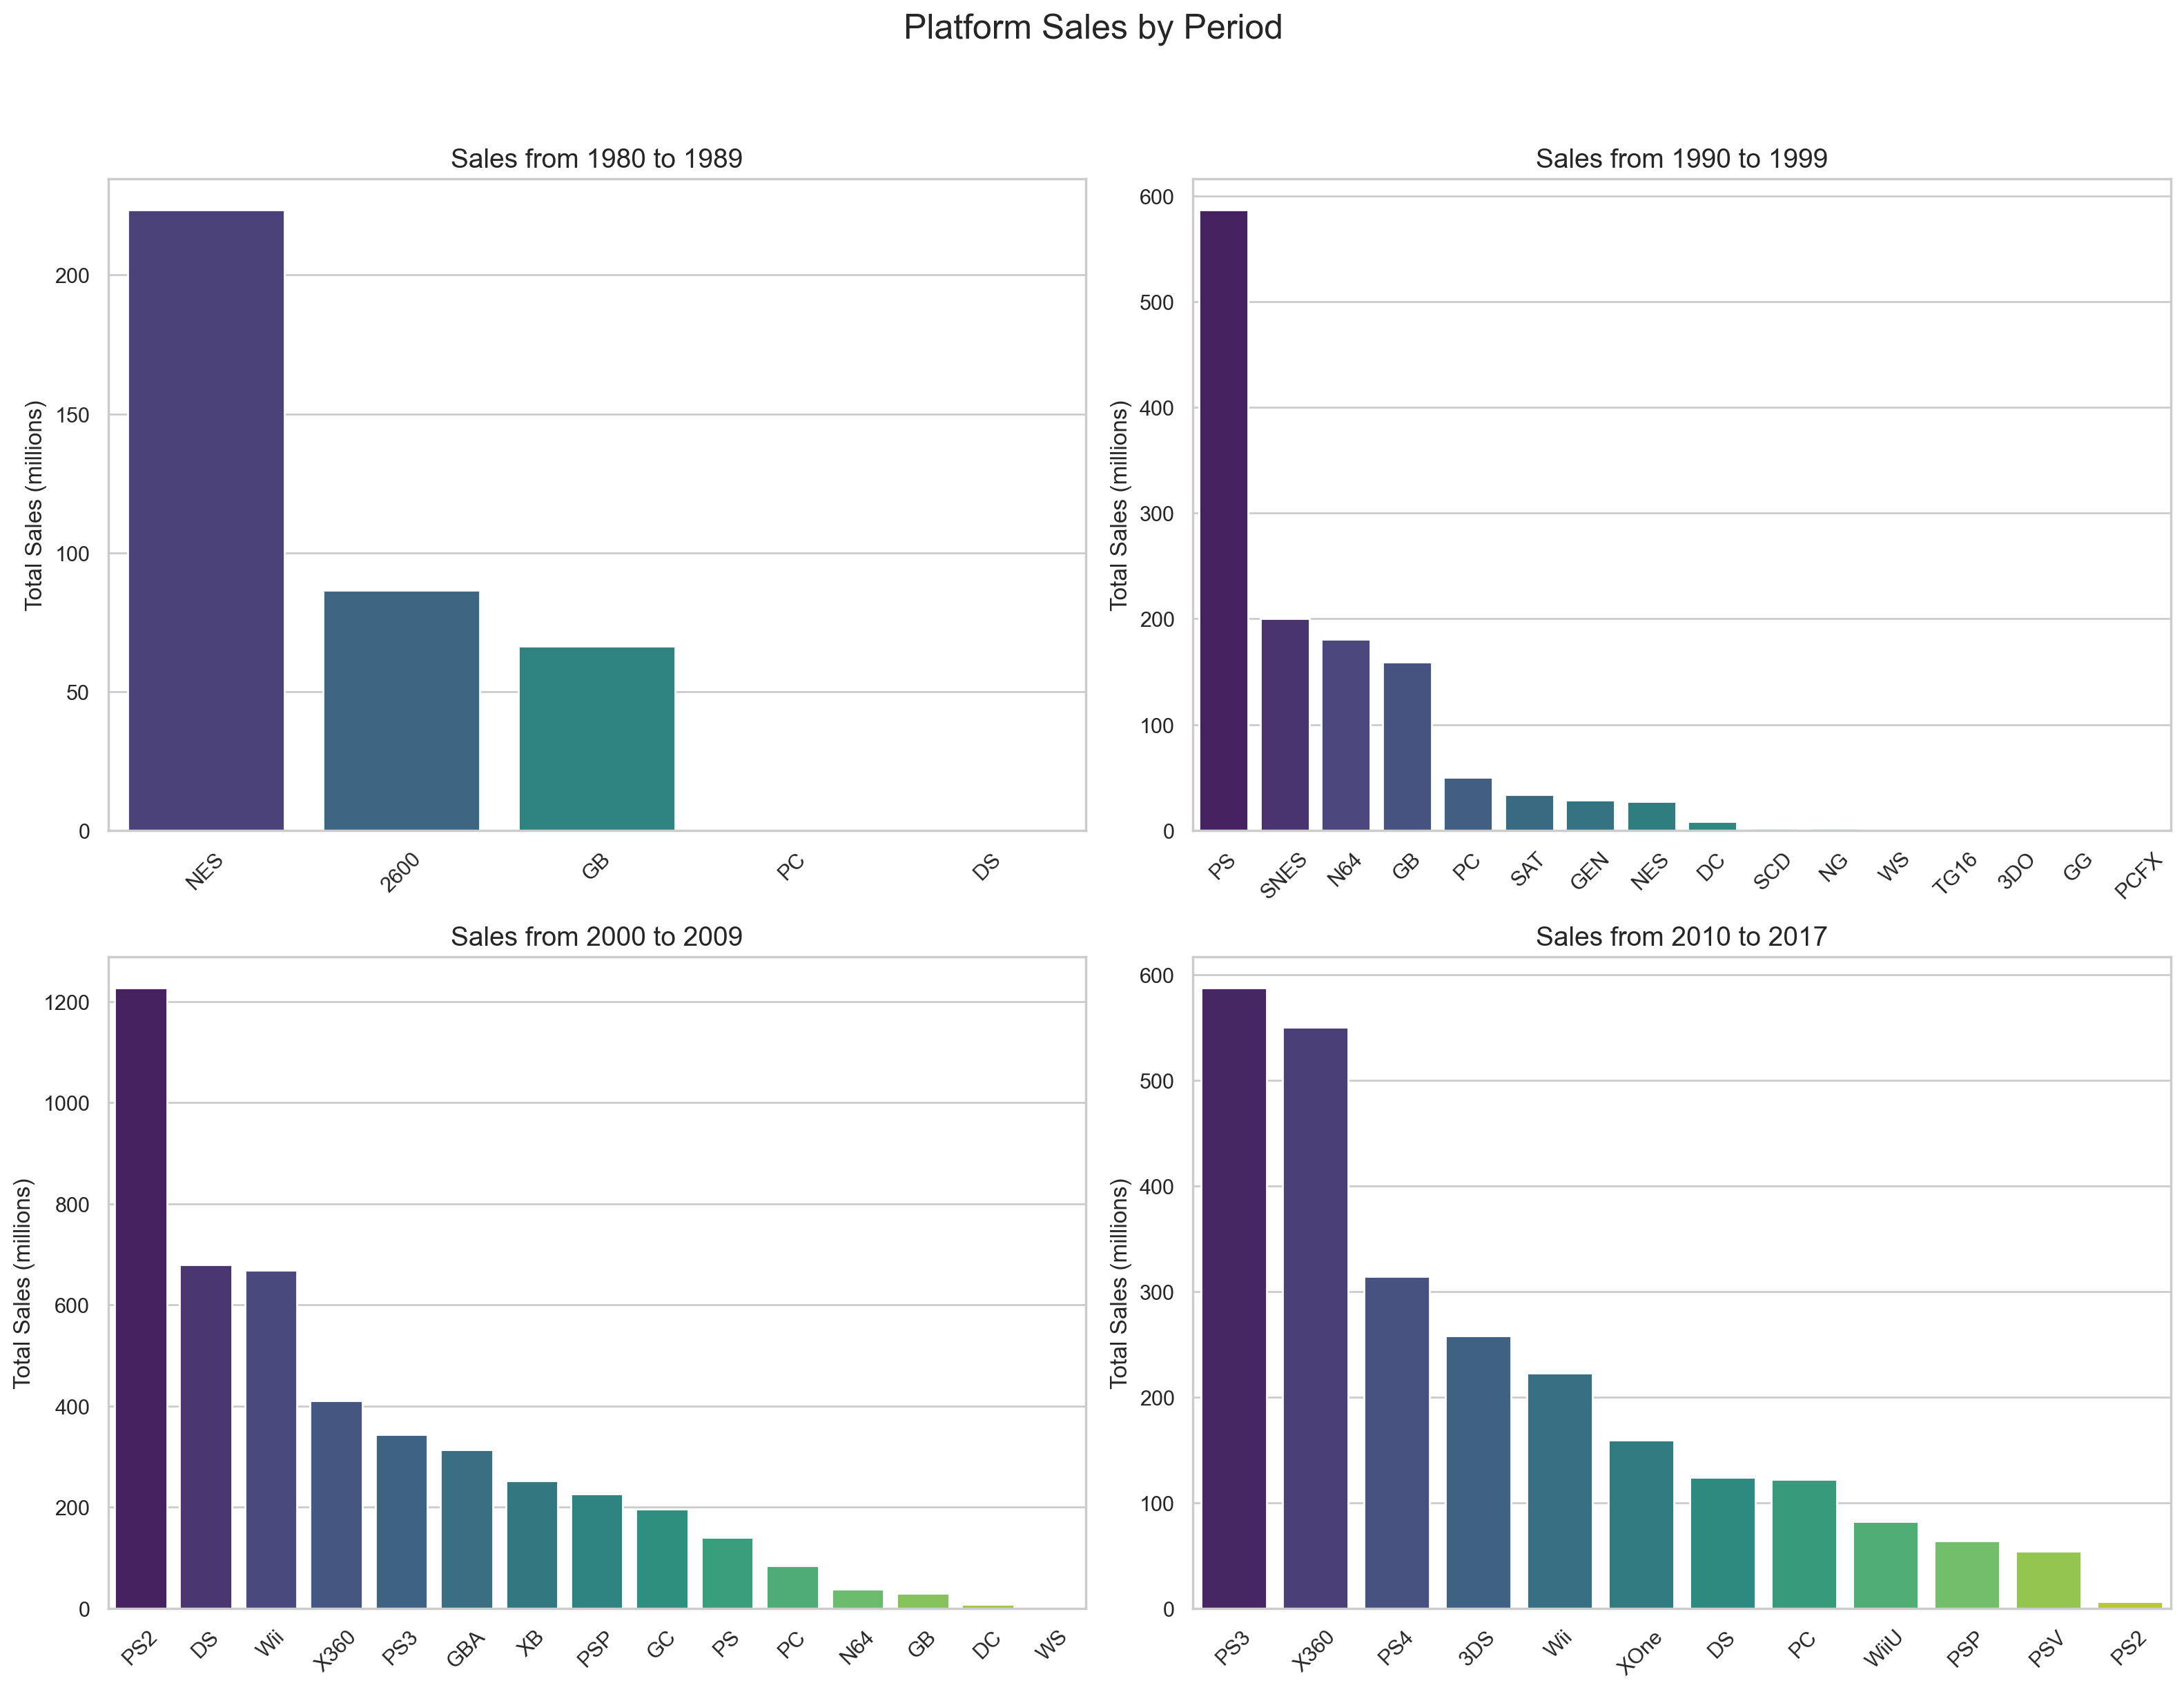

In [32]:
periods = [(1980, 1989), (1990, 1999), (2000, 2009), (2010, 2017)]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), dpi = 200)
fig.suptitle('Platform Sales by Period', fontsize=18, y=1.02)

for i, (start_year, end_year) in enumerate(periods):
    ax = axes[i // 2, i % 2]

    period_data = games_data[
        (games_data['year_of_release'] >= start_year) &
        (games_data['year_of_release'] <= end_year) &
        (games_data['year_of_release'] != 0)
    ]

    platform_sales = (
        period_data
        .groupby('platform')['total_sales']
        .sum()
        .reset_index()
        .sort_values(by='total_sales', ascending=False)
    )

    sns.barplot(
    data=platform_sales,
    x='platform',
    y='total_sales',
    hue='platform',
    palette='viridis',
    ax=ax,
    legend=False
)

    ax.set_title(f'Sales from {start_year} to {end_year}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Total Sales (millions)')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

We’ve now generated 4 separate bar charts for each time period — 1980–1989, 1990–1999, 2000–2009, and 2010–2017. Each chart displays the **total game sales per platform in millions of USD**, based on the cumulative sales of all games released for that platform during the given period.

From these visualizations, we can draw several insights:

1. **Few platforms remain relevant across multiple decades:**  
   One standout is the **PlayStation 3 (PS3)**, which appears in both the 2000s and the 2010s. It reached around 350 million USD in the 2000s and became a top-selling platform again in the following decade. Based on its release window (around 2006–2007), this makes sense: platforms tend to **reach their sales peak a few years after launch**. We see a similar pattern with the **Xbox 360**, **Wii**, **Nintendo DS**, and **PSP**, which also span two periods with notable performance.

2. **Many platforms peak only in the decade they were launched:**  
   Platforms like **Game Cube (GC)**, **Xbox (XB)**, and **Game Boy Advanced (GBA)** in the 2000s, or **SAT** and **GEN** in the 1990s, show significantly but they disappear in the following decade. 

3. **Estimated platform lifespan for top performers is about 8 years:**  
   Based on the graphs and previous pivot analysis, highly profitable consoles usually show a **single major sales peak**, generally in the **decade after their release**, followed by a decline. Few consoles maintain high sales over two full decades.

4. **Less successful platforms tend to have a similar lifespan:**  
   Even platforms with lower sales tend to last around the same **5–8 year range**, with some exceptions like the **GEN (Sega Genesis)**, which only remained commercially active for about 5 years.

5. **The top-selling platforms across all periods are consistently tied to three major companies:**  
   These include: **NES, Game Boy (GB), SNES, N64, PS1, DS, GBA, PS2, PS3, PSP, Wii, Xbox 360, Xbox, 3DS, PS4, PC, Wii U**, and **Xbox One**.  
   All of these systems were developed by **Sony, Microsoft, or Nintendo**, confirming their dominant position in the gaming market over the decades.


Now, I'm going to create a chart that visualizes the **timeline of the top 10 platforms with the highest total revenue** over the entire dataset period.

This plot will allow me to observe how these leading platforms evolved over time: when they peaked, how long they remained relevant, and how their sales trajectories compare. By focusing on the most commercially successful consoles, I can better understand long-term market dominance and generational transitions between platforms.

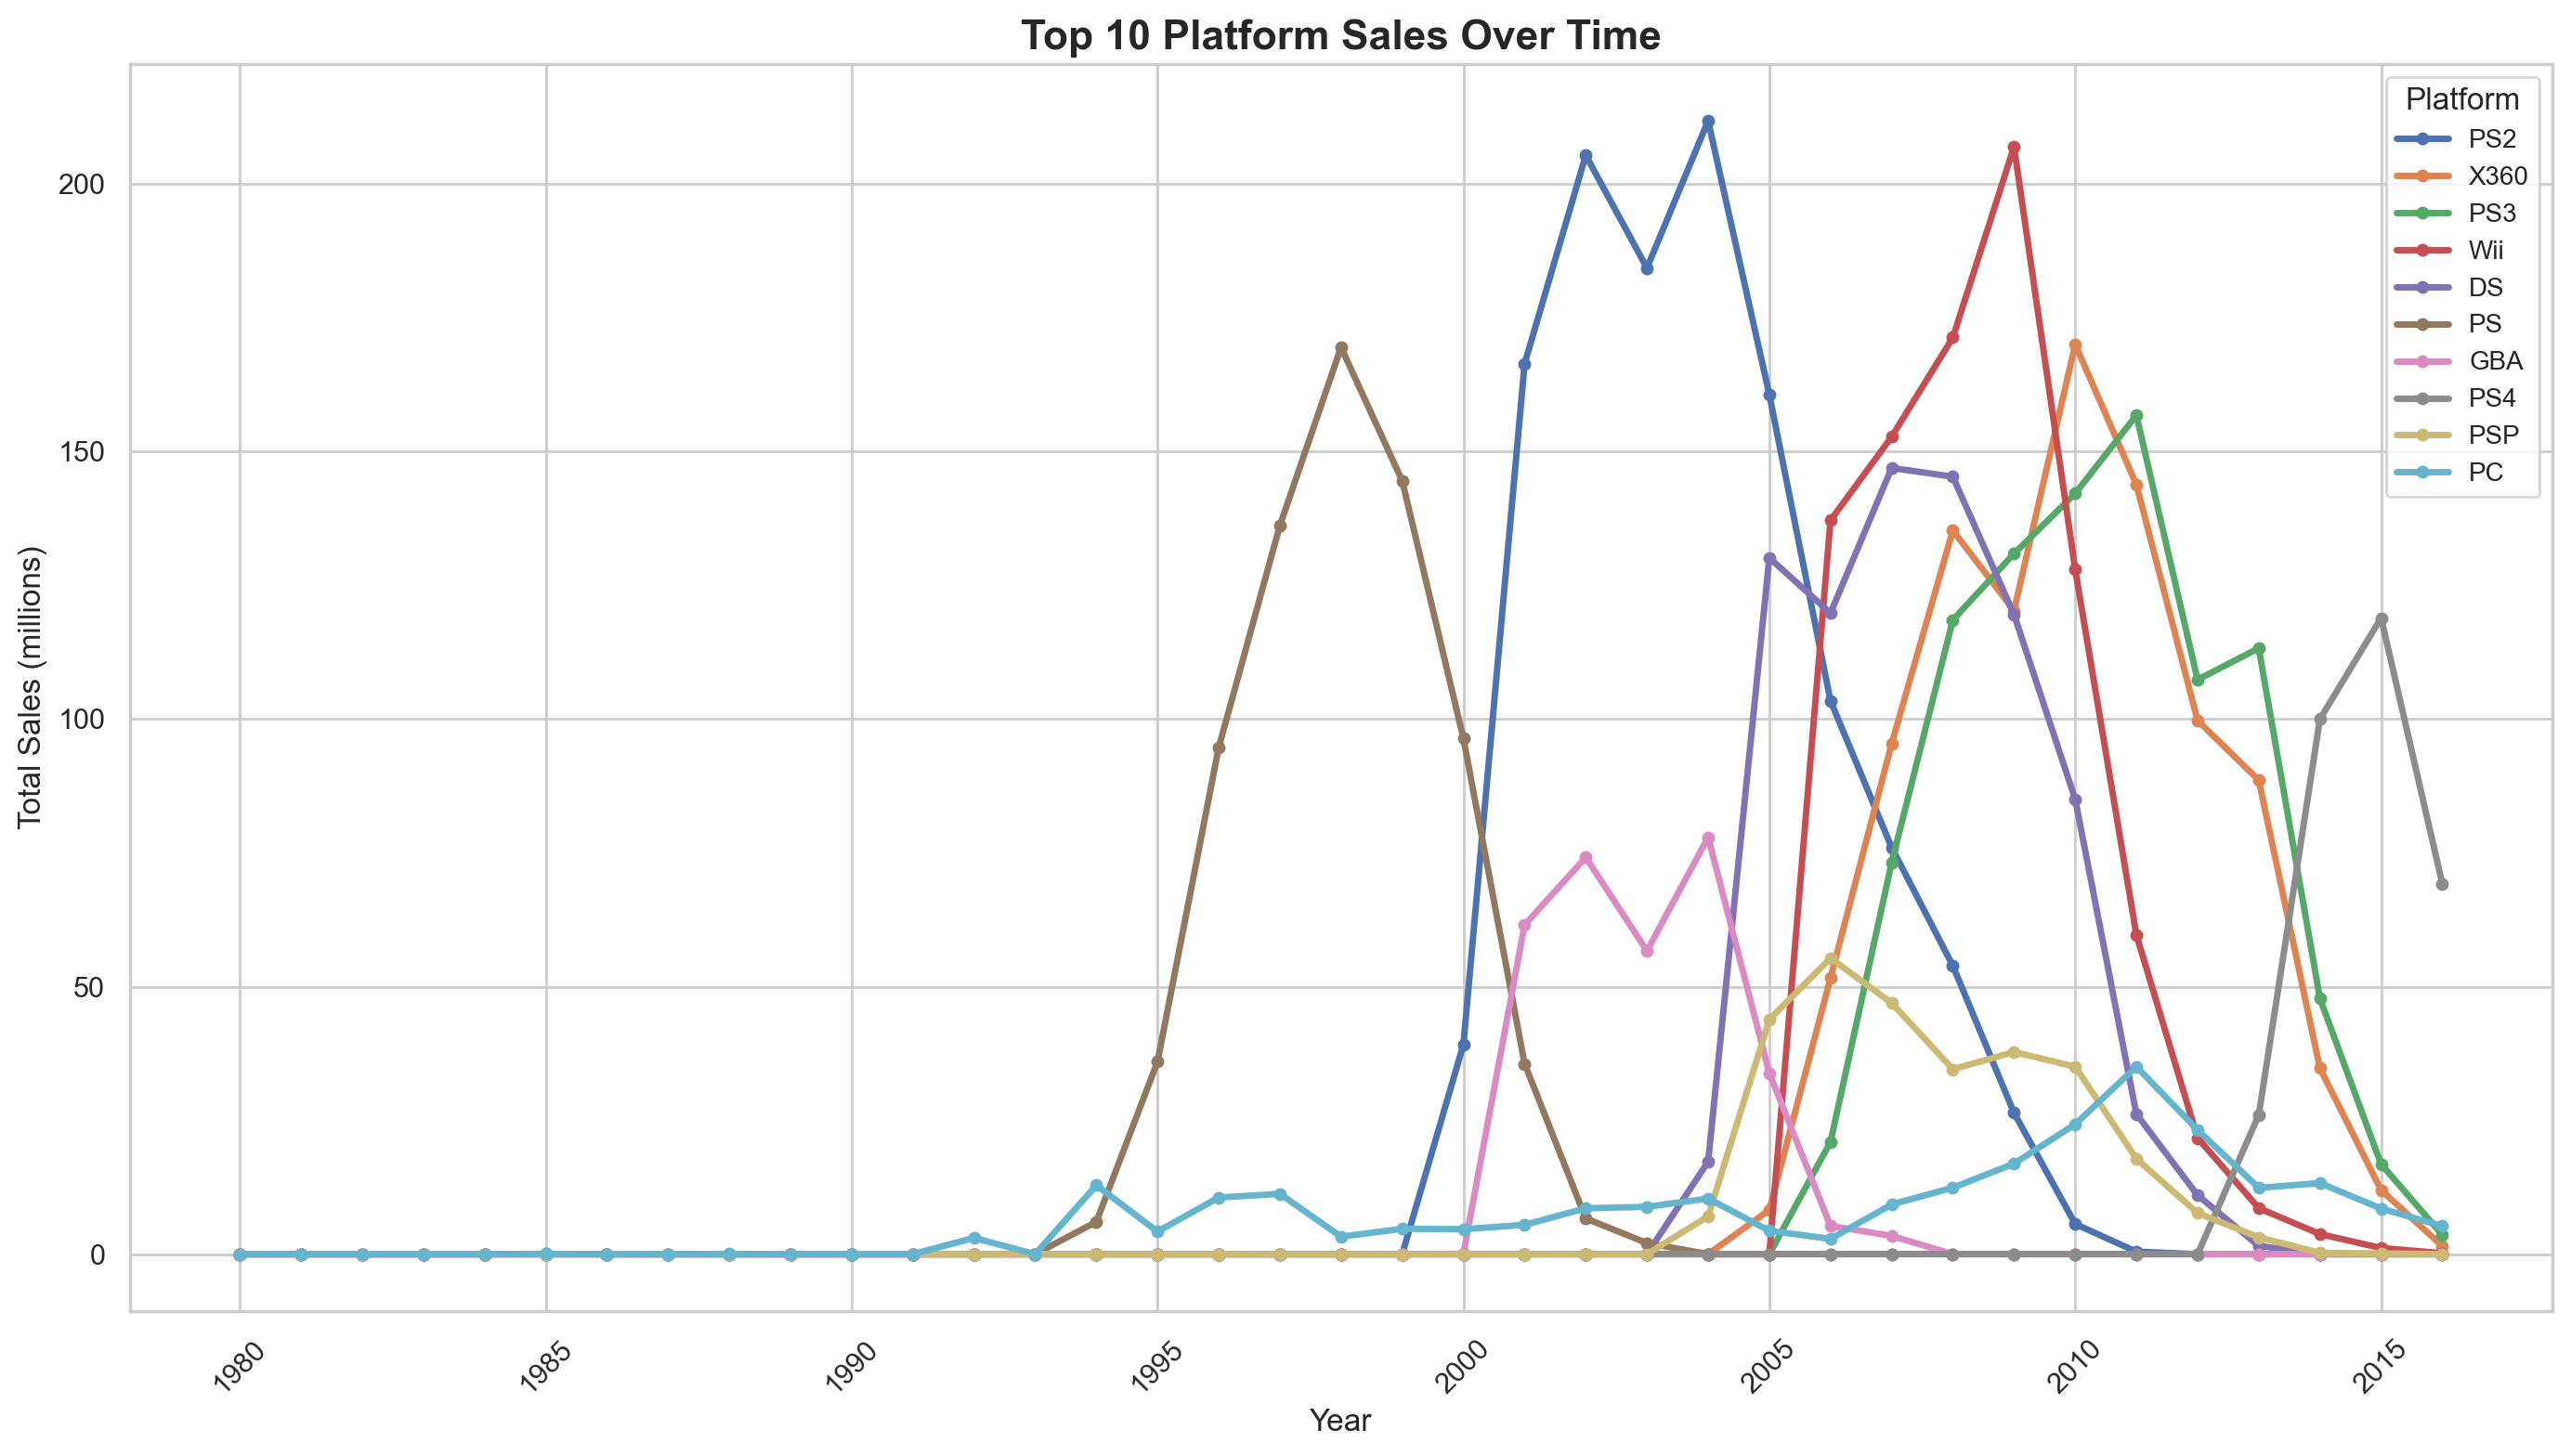

In [33]:
top_10_platforms = games_data.groupby('platform')['total_sales'].sum().nlargest(10).index

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8), dpi=200)

for platform in top_10_platforms:
    plt.plot(
        games_data_pivot.columns,                            
        games_data_pivot.loc[platform],                      
        label=platform,
        linewidth=2.5,
        marker='o',                                          
        markersize=4
    )

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.title('Top 10 Platform Sales Over Time', fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.legend(title='Platform', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

This chart shows the **sales trends of the 10 most profitable platforms** throughout the entire dataset. One standout is the **PC**, which ranks 10th but displays a significantly lower sales profile compared to the other top platforms. Each platform shows a **clear sales peak during its active period**, followed by a natural decline, illustrating a pattern of **growth, maturity, and obsolescence**.

This recurring rise-and-fall trend gives us a solid foundation to **model future behavior**. By observing these historical patterns, we can make informed projections for upcoming years with reasonable confidence.

However, it’s also important to consider platforms that didn't make the top 10 but are **still active**, such as the **Xbox One (XOne)**. These platforms continue to have new releases and may become more relevant in the near future.

For the core analysis of this project, I’ll focus on a **six-year window starting from 2011**. Since the objective is to support **short-term planning for a single upcoming year**, a 6-year historical window provides a balance between **recency** and **trend visibility**. This period should clearly highlight:
- The **decline of older platforms**
- The **emergence of new ones**
- And a reliable snapshot of the current market dynamics

To align with this focus, I’ll **filter out all data prior to 2011**. This will eliminate outdated platforms and legacy games that could skew the interpretation of today’s market. The resulting dataset will reflect the **most recent and commercially relevant platforms**.


In [34]:
newest_games = games_data[games_data['year_of_release'] >= 2011]
newest_games = newest_games[newest_games['year_of_release'] != 0]

### Analysis of Recent Years and Modern Platforms

Now that the dataset has been trimmed to include only data from **2011 onward**, the focus shifts to analyzing the **most recent platforms** and their sales trends.

This phase will help reveal:
- Which platforms have gained momentum in the last five years
- How older platforms have declined or phased out
- Which platforms are likely to dominate the market in the near future

By narrowing the scope to modern platforms and recent data, the analysis becomes more relevant for **short-term forecasting** and **strategic planning**. The insights gathered here will serve as the foundation for identifying the most promising consoles and genres to target in upcoming marketing campaigns.

Let's take a look at the **newest games**


In [35]:
newest_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [36]:
newest_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64

In [37]:
newest_games_pivot = pd.pivot_table(newest_games[newest_games['year_of_release'] != 0], 
                                  values = 'total_sales', 
                                  index = 'platform', 
                                  columns = 'year_of_release',
                                  aggfunc = 'sum',
                                  fill_value = 0)
newest_games_pivot.style.highlight_max(axis=1, color='lightgreen').format("{:.2f}")

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,0.00,0.00,0.00
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,0.00,0.00,0.00,0.00,0.00
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,0.00,0.00,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,0.00
PSV,4.63,16.19,10.59,11.90,6.25,4.25
Wii,59.65,21.71,8.59,3.75,1.14,0.18


Starting from 2011, we can observe a **clear platform transition period**, where new consoles were launched and older ones began to lose relevance.

 1) Emerging Platforms
Consoles like the **PS4, Xbox One (XOne), Wii U, and PS Vita (PSV)** have shown **consistent year-over-year growth** since their respective launches. These platforms present excellent opportunities for investment, particularly the **PS4**, which has recorded the **highest revenue in recent years**. Given the long-term success of its predecessors (PS2 and PS3), it’s likely this trend will continue.

The **Xbox One** also demonstrates strong sales patterns, although it experienced a **slight dip in 2016**. However, with only four years on the market by then, the platform is still considered relatively new, and it's reasonable to expect it will **retain relevance for a few more years**.

 2) Declining Platforms
In contrast, some older platforms have reached **zero or near-zero sales** in this period, such as the **PSP**. Others, like the **Wii, Xbox 360, PS3, and DS**, show **sharp downward trends** in sales. These platforms are being naturally phased out as their successors gain traction, which aligns with typical console generation cycles.

 3) **An Outlier**: The most unusual case is the **PC**. It maintained **stable sales** in the early years but experienced a **sharp drop recently**. However, unlike traditional consoles, the PC doesn’t have a defined lifecycle. Users **don’t lose access to their games when upgrading their hardware**, which makes the PC a **non-obsolete platform** despite occasional sales fluctuations. This unique characteristic suggests that PC sales should be interpreted with more nuance, as its ecosystem is **inherently persistent** compared to time-limited console generations.


### Analysis of games and platforms

Now let's explore the **distribution of global game sales across platforms**, to better understand how individual games perform within each console ecosystem.

To do this, I’ll use boxplots, which are ideal for summarizing the median sales per game per platform, the spread of sales (interquartile range) and potential outliers (exceptionally high- or low-selling games)

This visualization will help identify:
- Which platforms have a more consistent sales performance
- Which ones have occasional outstanding games
- And whether certain platforms tend to produce more high-variance results in terms of individual game success


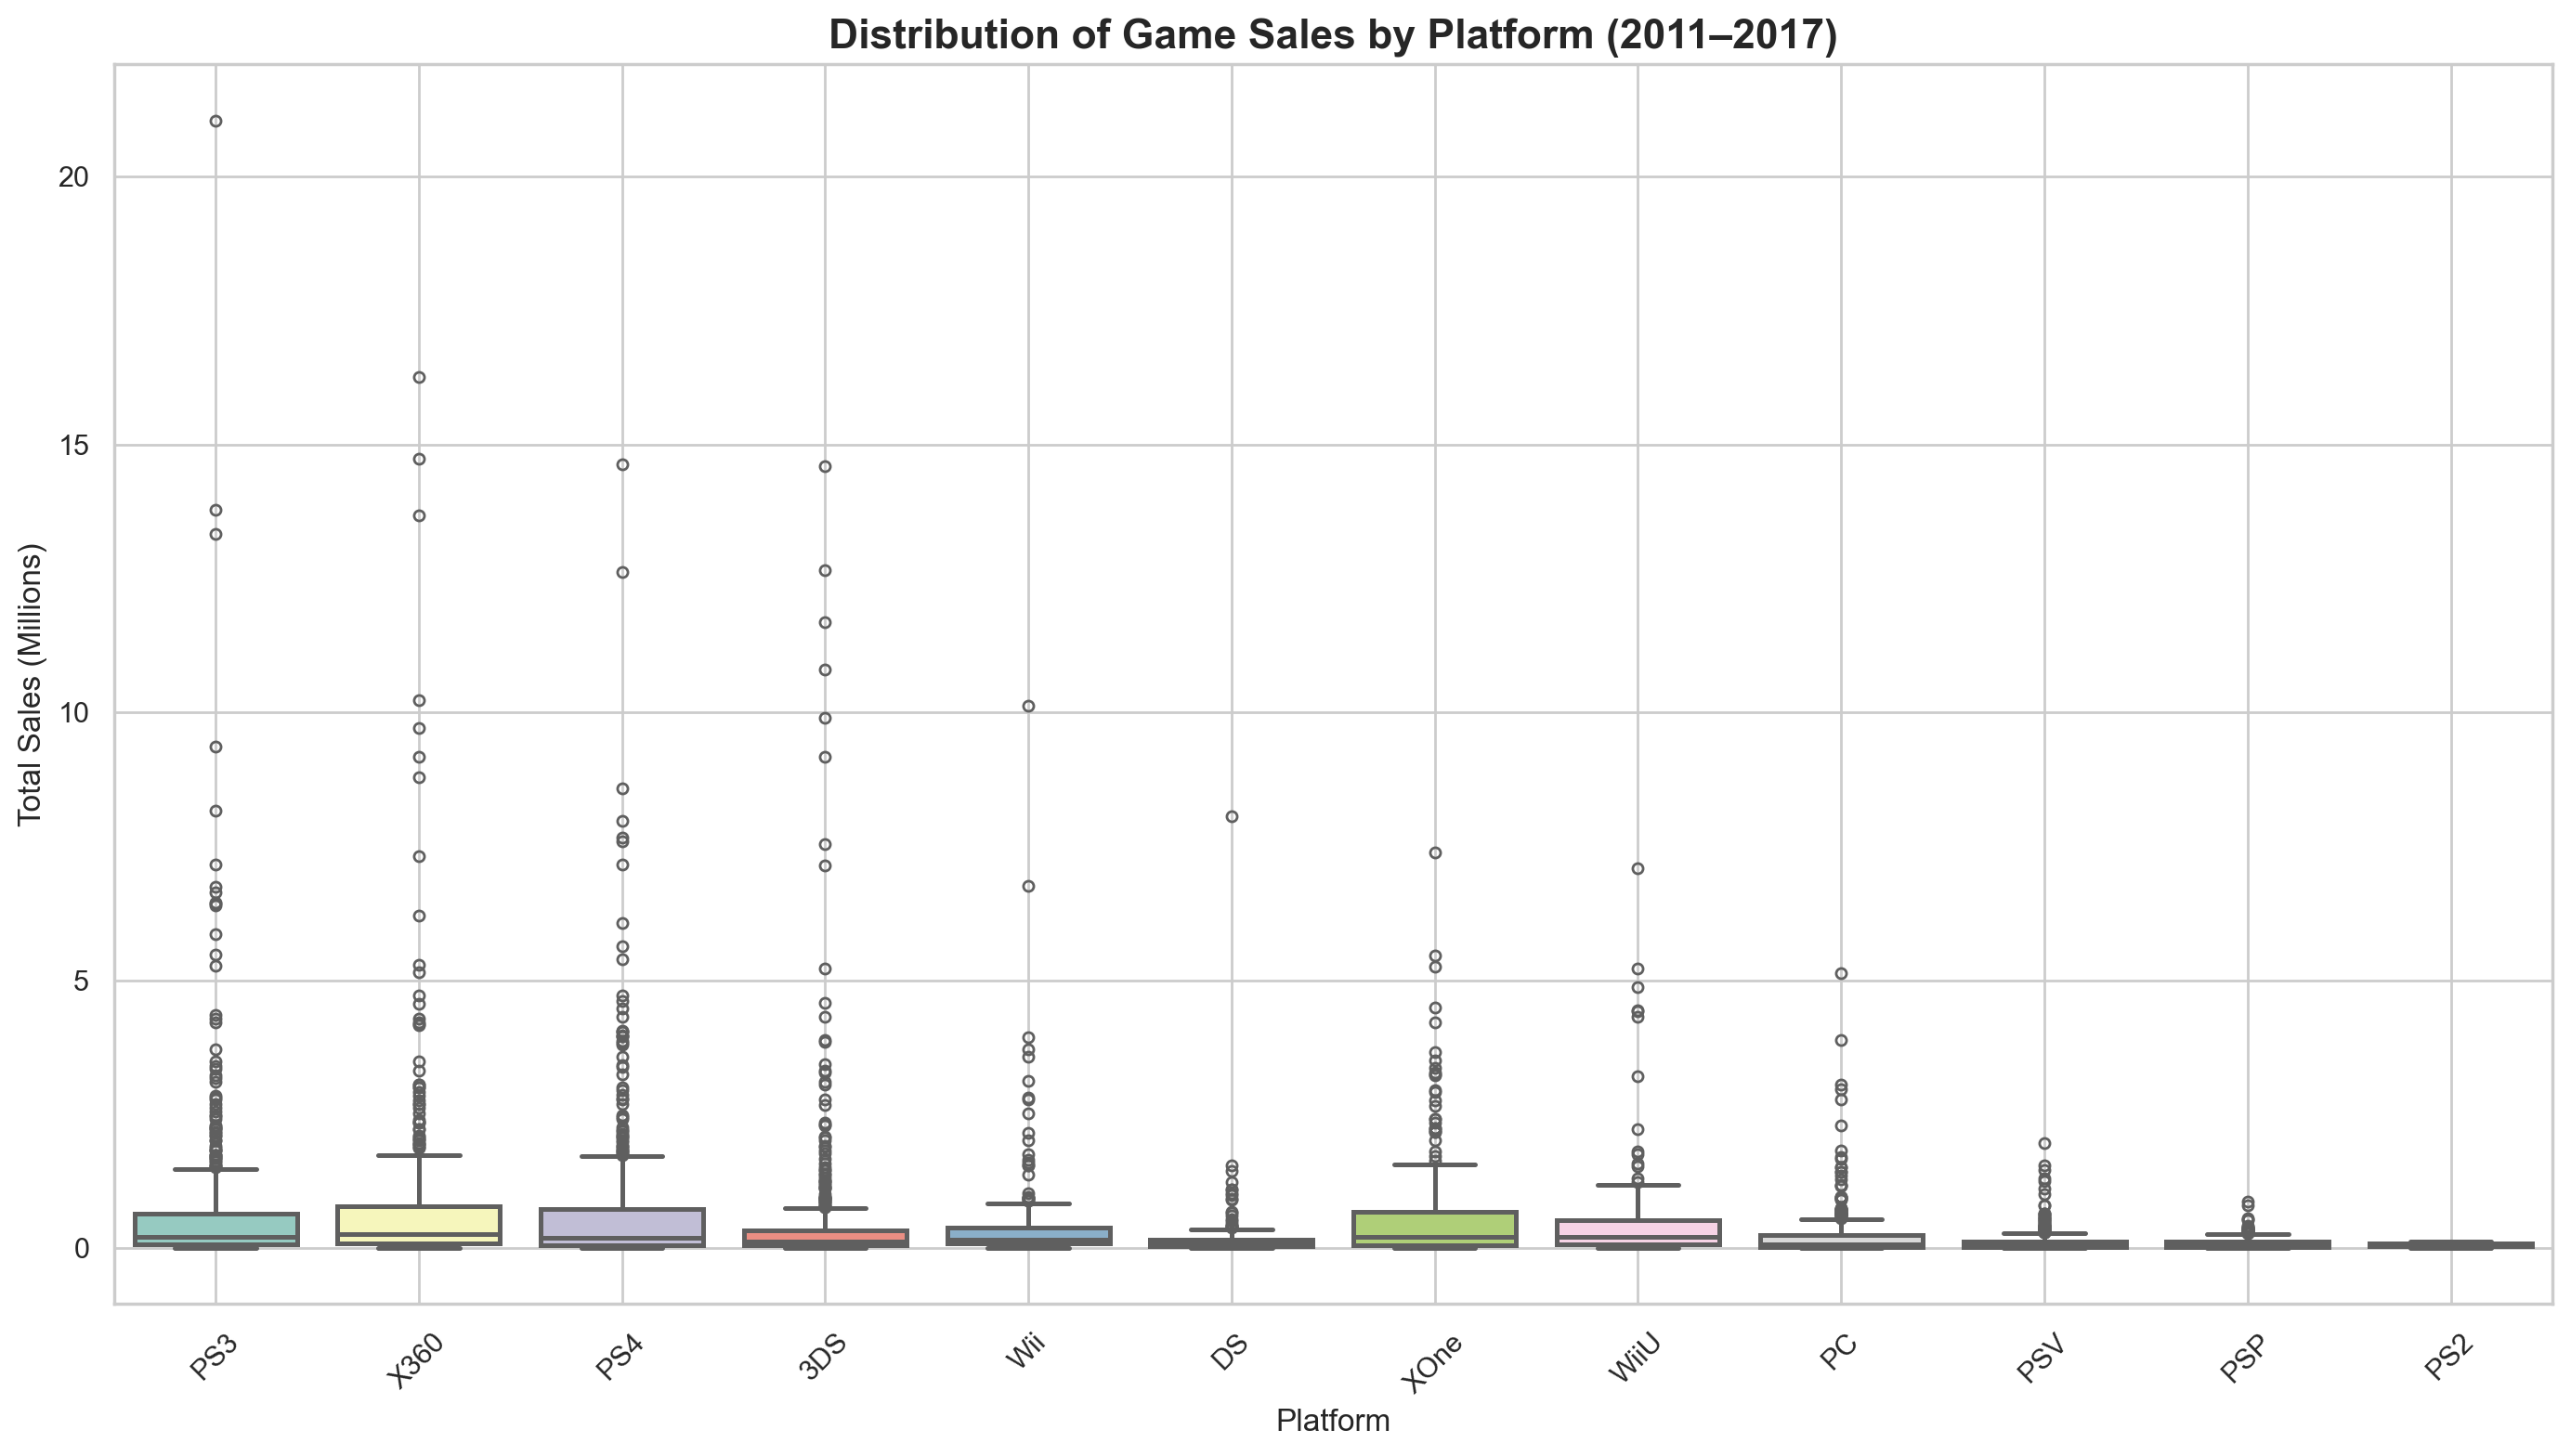

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8), dpi=200)

sns.boxplot(
    data=newest_games,
    x='platform',
    y='total_sales',
    hue='platform',
    palette='Set3',
    linewidth=1.8,
    fliersize=4,
    legend=False
)

plt.title('Distribution of Game Sales by Platform (2011–2017)', fontsize=16, weight='bold')
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


From the boxplots, we can analyze both the **median sales per platform** and the **presence of outliers**, which reflect extremely high-selling games.

1) Median Sales: Most platforms show a very similar median, indicating that the average game performs comparably across consoles. A few platforms, such as the **Xbox 360, PS3, and PS4**, show slightly higher medians, suggesting that typical game sales were a bit stronger on those systems, but overall, the differences are modest.

2) Outliers and top performances: Where we really see differences is in the presence of outliers:
- Platforms like the **PS3, PS4, Xbox 360, Xbox One, and 3DS** show **extremely high outliers**, indicating that they hosted some titles that far exceeded average performance.
- These consoles likely had a strong catalog of best-sellers and franchises with wide appeal.

Interestingly, every platform shows at least some outlier values, which means each had at least a few standout successes.

3) Selecting plataforms for further analysis: Based on this distribution, I’ve chosen to focus the next part of the analysis on the **3PS3, X360, PS4, 3DS and XOne**:
- It’s the group of platforms with the most consistently high outliers.
- It contains older and newer platforms, which gives it a rich and stable history of titles and sales.
- It contains the largest outliers overall.

This makes these a platform some solid candidates for exploring how **user and critic ratings** relate to sales performance, and whether high-scoring games tend to sell better within a successful platform.


### Correlation Analysis: Sales, User Ratings, and Critic Ratings

To investigate whether game sales are influenced by user and critic ratings, I’ll create a scatterplot that compare both users and critics score with total sales.

The goal is to visually assess whether there's a correlation between how well a game is rated and how well it sells. 

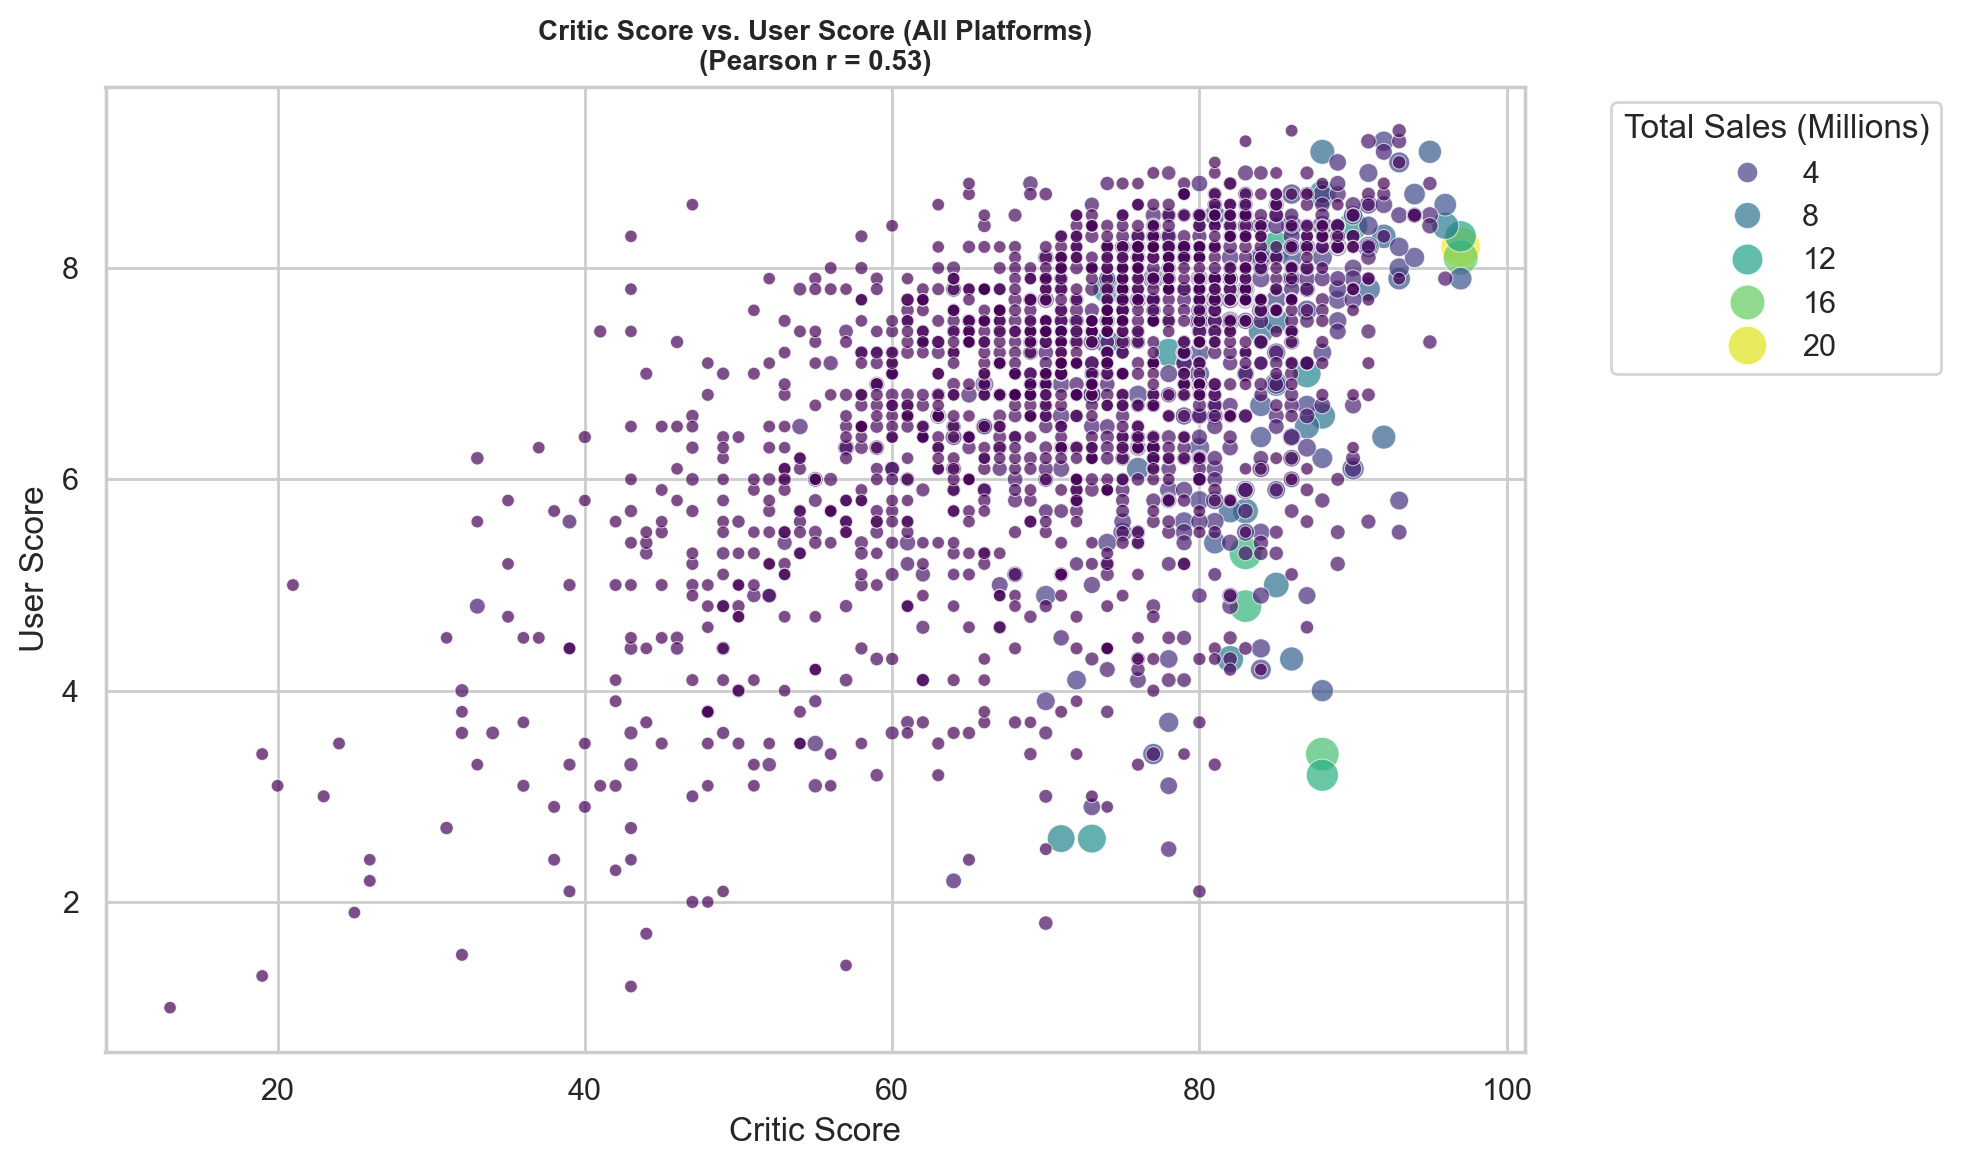

In [39]:
clean_data = newest_games[['critic_score', 'user_score', 'total_sales']].dropna()

corr, p_value = st.pearsonr(clean_data['critic_score'], clean_data['user_score'])

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6), dpi=200)
scatter = sns.scatterplot(
    data=clean_data,
    x='critic_score',
    y='user_score',
    hue='total_sales',
    palette='viridis',
    size='total_sales',
    sizes=(20, 200),
    alpha=0.7,
    legend='brief'
)

plt.title(f'Critic Score vs. User Score (All Platforms)\n(Pearson r = {corr:.2f})', fontsize=10, weight='bold')
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.legend(title='Total Sales (Millions)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


This scatter plot shows a clear positive trend: as user and critic ratings increase, total game sales also tend to rise. Games that score highly on both dimensions tend to exhibit **very strong sales performance**.

Most data points are concentrated in the region where:
- User scores range from 6 to 9
- Critic scores range from 60 to 90

This suggests that most commercially released games receive decent to good reviews, and games in this range tend to be where the market’s “core” performance lies.

There are also some outliers worth noting:
- A few games have a critic score close to 90, but a user score around 4, and yet still show high sales. These may represent hyped launches, games with strong marketing but mixed reception, or titles with polarizing gameplay.

**Pearson Correlation Insight**: We also calculated the Pearson correlation between user scores and critic scores, which resulted in a correlation of about 0.53 (53%).  
    - This indicates a moderate positive relationship: the two ratings generally move in the same direction.  
    - When both scores are aligned, games tend to be more successful commercially.

To further understand the impact of each rating type on sales, I’ll now calculate two separate correlations:
- One between total sales and user score
- One between total sales and critic score

This will help identify which type of rating is more strongly associated with commercial success.


In [40]:
newest_games['total_sales'].corr(newest_games['critic_score'])

0.3299765050114584

When we isolate the critic score and calculate its correlation with total sales, we find a Pearson correlation of approximately 33%.

This suggests a **moderate positive correlation**, meaning that as critic ratings increase, sales also tend to increase. However, the strength of this relationship is not particularly high: it implies a general trend, but not a strong predictive power on its own.

In practical terms, this means that while better-reviewed games by critics are somewhat more likely to perform well commercially, other factors likely play a significant role too, such as:
- Brand recognition or franchise value
- Marketing investment
- Platform exclusivity
- User reception

So, critic scores alone are not a strong predictor of commercial success, but they do offer a useful directional signal.


In [41]:
newest_games['total_sales'].corr(newest_games['user_score'])

0.03163612772559287

When analyzing user scores, I found a correlation of just 3.1%, which is considered weak.

This suggests that **critic reviews tend to have a stronger influence on sales** than user reviews. Games that are highly rated by professional reviewers generally sell more, while games praised by users don’t necessarily achieve the same commercial success.

One possible explanation for this is genre. A game can be critically acclaimed for its technical or artistic merits, but still fail to connect with a wider audience, and the opposite is also true. Some genres may strongly appeal to players but receive bad reviews from critics.

To dive deeper into this, I’ll now compare games released on multiple platforms. This will help determine whether success remains consistent across different systems. I’ll focus on the five most popular platforms identified earlier: **3DS, PS3, PS4, X360, and XOne**.


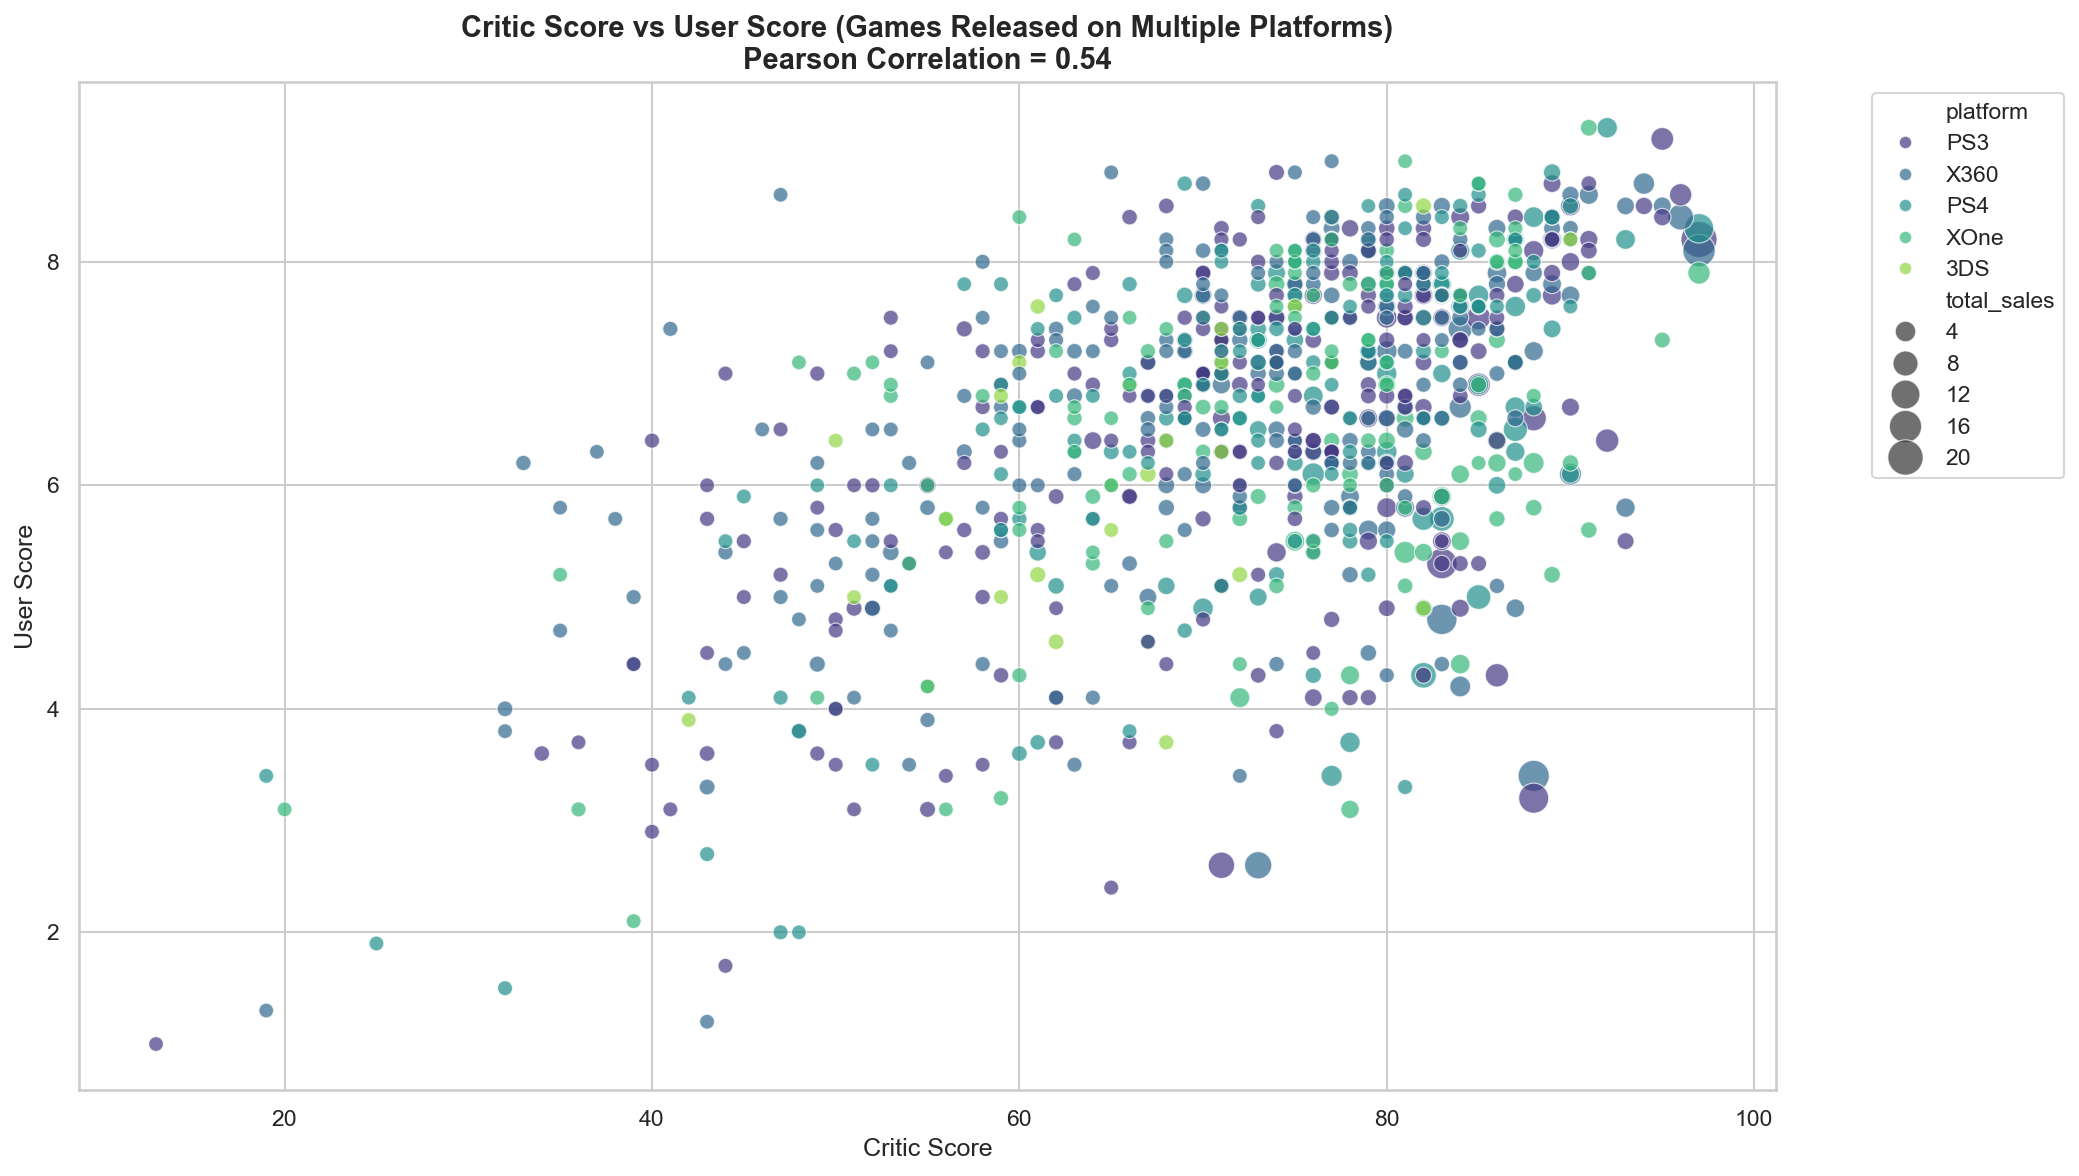

In [42]:
popular_plats = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']

games_popular_plats = newest_games[newest_games['platform'].isin(popular_plats)]

same_games = games_popular_plats[games_popular_plats.duplicated(subset='name', keep=False)].copy()

same_games = same_games.dropna(subset=['critic_score', 'user_score', 'total_sales'])

corr_critic_user = same_games['critic_score'].corr(same_games['user_score'], method='pearson')

plt.figure(figsize=(14, 8), dpi=150)
sns.set(style="whitegrid")

scatter = sns.scatterplot(
    data=same_games,
    x='critic_score',
    y='user_score',
    hue='platform',
    size='total_sales',
    sizes=(50, 300),
    alpha=0.7,
    palette='viridis'
)

plt.title(f'Critic Score vs User Score (Games Released on Multiple Platforms)\nPearson Correlation = {corr_critic_user:.2f}',
          fontsize=14, weight='bold')
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


After plotting a new scatter plot using only the games that were released on more than one platform, I noticed a very similar pattern to what I observed previously, but with fewer data points.

This visualization reinforces an important insight: identical games released on different platforms tend to show similar behavior in terms of sales, critic scores, and user ratings. The scores remain clustered within the same range, which suggests that the evaluation of a game is primarily associated with the game itself, not the platform it’s played on.

### Different genre analysis

With bar plots, I’ll be able to clearly visualize which game genres are the most profitable and the most popular (in terms of number of releases)..

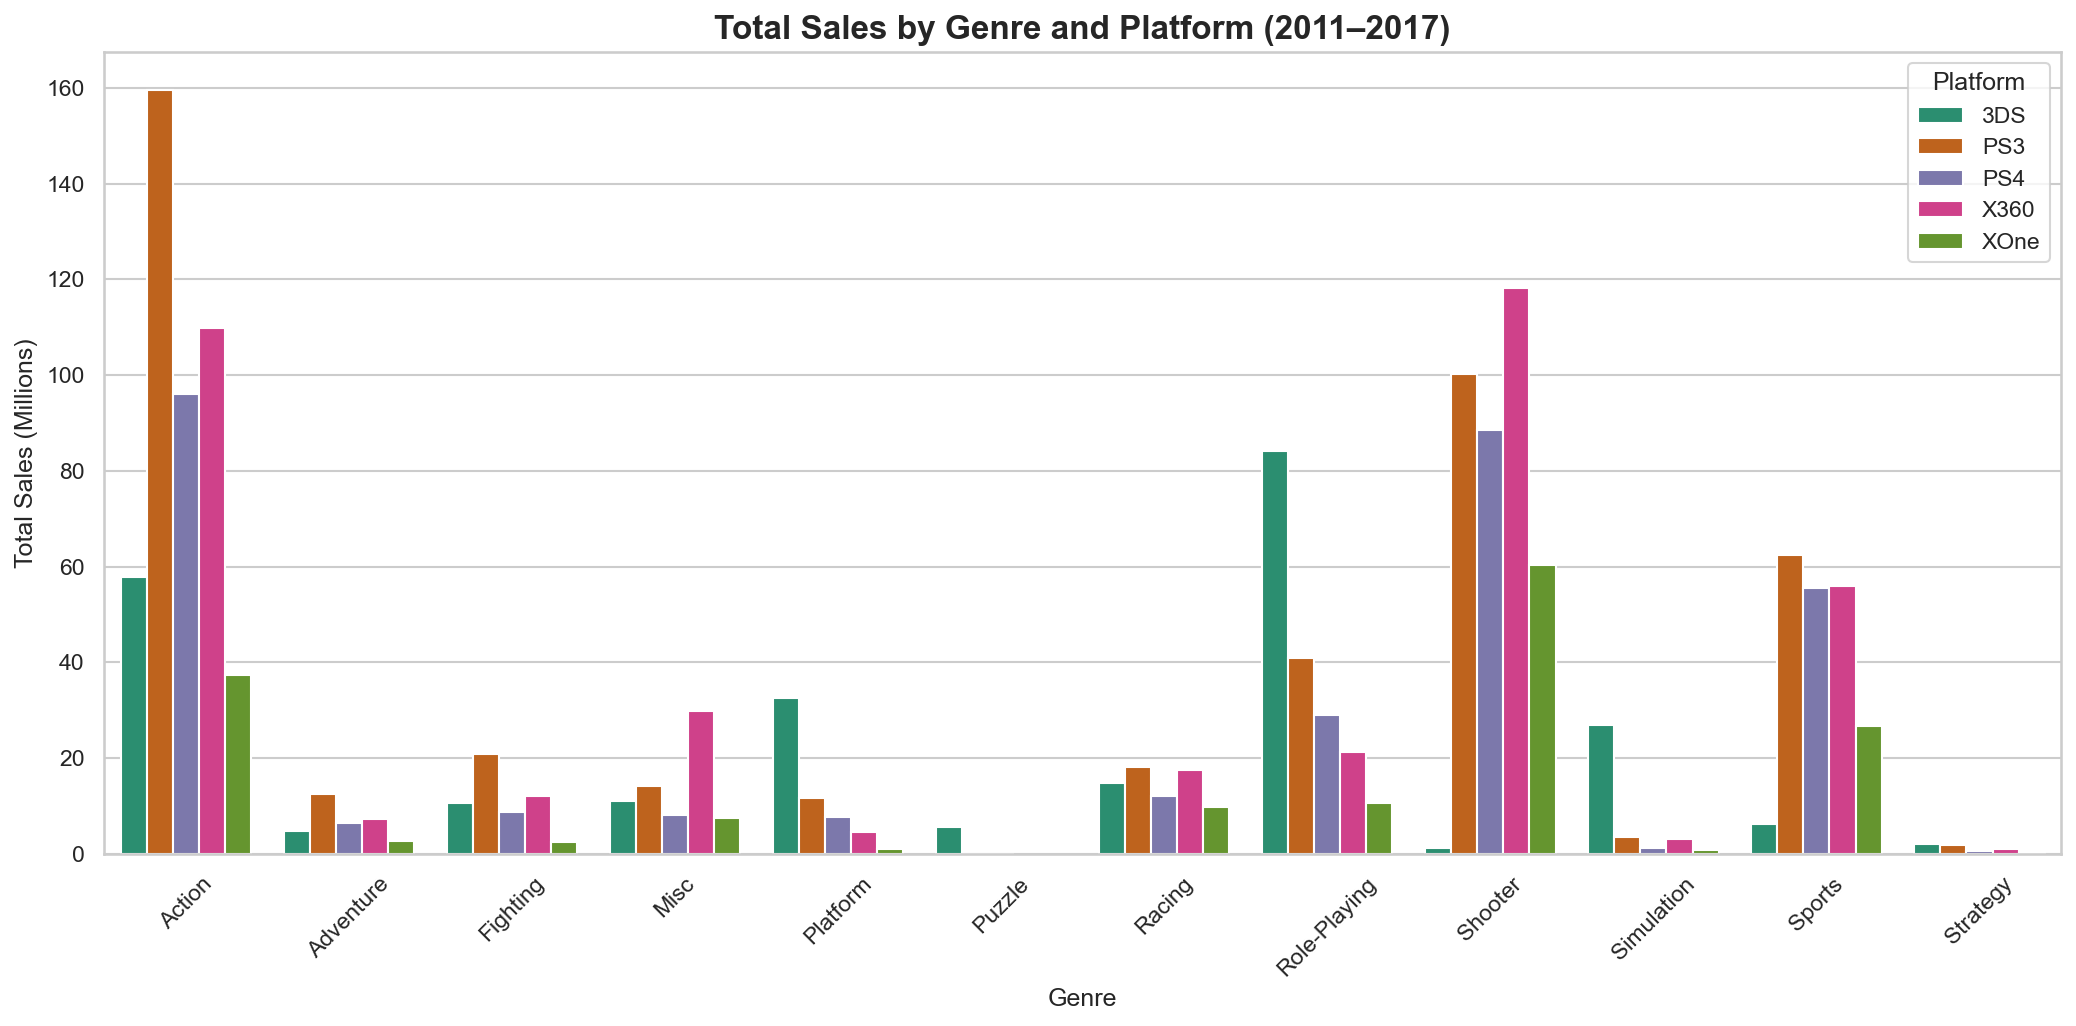

In [43]:
popular_plats = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']
genre_sales = (
    newest_games[newest_games['platform'].isin(popular_plats)]
    .groupby(['genre', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7), dpi=150)
sns.barplot(
    data=genre_sales,
    x='genre',
    y='total_sales',
    hue='platform',
    palette='Dark2'
)

# Aesthetics
plt.title('Total Sales by Genre and Platform (2011–2017)', fontsize=16, weight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

By comparing all game genres across the most popular platforms (3DS, PS3, PS4, X360, XOne), I was able to extract several meaningful insights:

1. **Most Profitable Genres**  
   The top-performing genres in terms of total sales are **Action**, **Role-Playing**, **Shooter**, and **Sports**,  with **Action** leading across all platforms. This aligns with global gaming trends and indicates high market demand for dynamic, fast-paced experiences.

2. **Genre Preferences by Platform**  
   Genre popularity shifts based on platform. Sony and Microsoft consoles (PS3, PS4, X360, XOne) show a strong dominance of **Shooter** and **Action** games, with these genres reaching 260M USD in sales on PS3 alone. In contrast, the 3DS from Nintendo has a distinct profile: excelling in **Role-Playing**, **Platform**, **Puzzle**, and **Simulation** games. These trends reflect differences in target demographics and game design philosophies between companies.

3. **Strategic Implications for Publishers**  
   This breakdown reveals genre-platform fit. For instance, if a developer is designing a Strategy game, it may not be wise to target these platforms exclusively, given the consistently low sales in this genre. On the other hand, investing in Action or Shooter games for PlayStation or Xbox consoles seems like a safer and more profitable bet.



### Different regional profiles

Different regions tend to show different preferences when it comes to videogames. To better understand global trends, I decided to break down the sales performance by region. This approach allows me to identify the most popular platforms in each part of the world and spot regional tendencies that could influence strategic decisions, such as targeted marketing or platform-specific releases.

Before diving into genres or specific titles, I’ll first analyze the behavior of platforms across each region to detect any significant differences in popularity.


In [44]:
def highlight_top5(s, color='lightgreen'):
    is_top5 = s.rank(method='min', ascending=False) <= 5
    return [f'background-color: {color}' if v else '' for v in is_top5]

platform_sales = newest_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
platform_sales.style.apply(highlight_top5, subset=['na_sales', 'eu_sales', 'jp_sales'], axis=0).format("{:.2f}")


,na_sales,eu_sales,jp_sales
platform,,,
3DS,82.65,61.27,100.62
DS,18.86,9.24,8.04
PC,29.88,56.70,0.00
PS2,0.13,0.13,0.09
PS3,168.26,163.10,49.39
PS4,108.74,141.09,15.96
PSP,2.19,1.77,24.04
PSV,12.47,13.07,21.84
Wii,48.56,29.60,8.97


We can clearly observe that platform preferences vary greatly across regions. In North America, the best-selling platform is the **Xbox 360**, while in Europe it's the **PlayStation 3**, and in Japan, the **Nintendo 3DS** takes the lead. Interestingly, **PC** shows up among the top in Europe, while **PSVita** appears in Japan, a platform we weren’t even considering initially as relevant.

This highlights how crucial it is to break down our analysis by region. The consumer profile changes significantly depending on the part of the world we're looking at. Strategies and expectations need to be tailored for each market.

Since platform preference shifts by region, let’s now analyze which genres perform best across different regions.

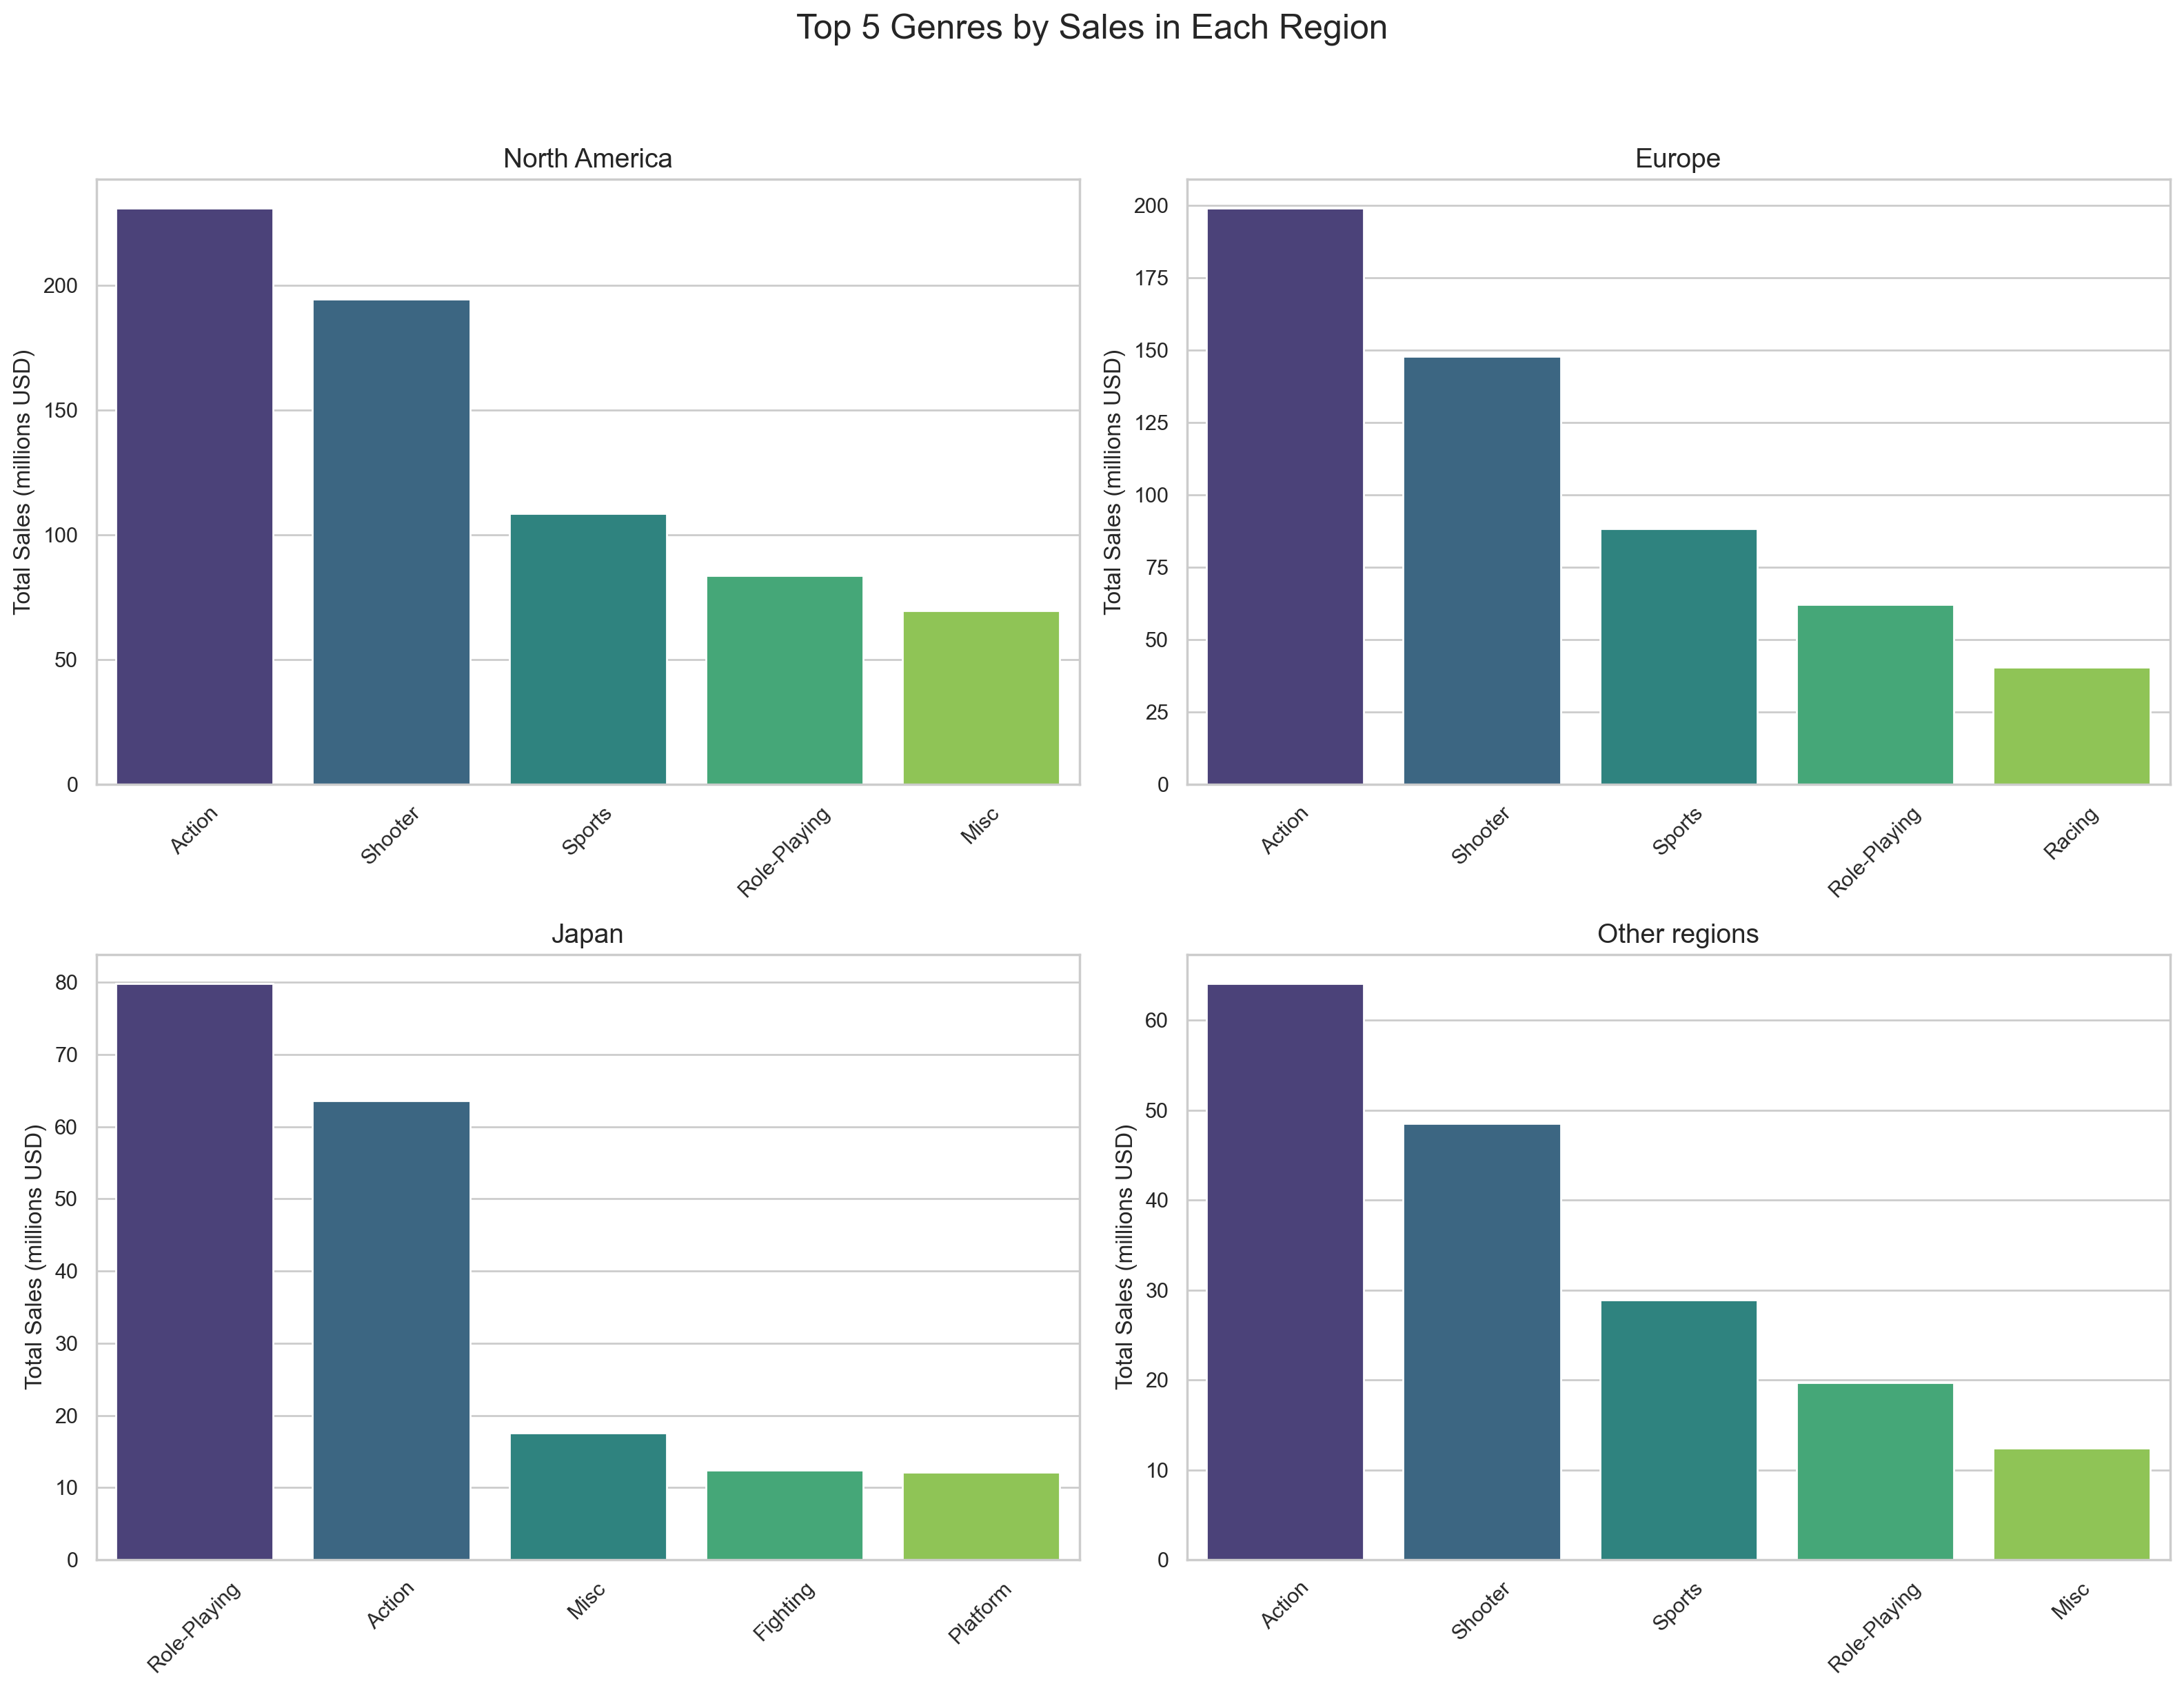

In [45]:
sns.set(style="whitegrid")

regions = {
    'North America': 'na_sales',
    'Europe': 'eu_sales',
    'Japan': 'jp_sales',
    'Other regions': 'other_sales'
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=200)
fig.suptitle('Top 5 Genres by Sales in Each Region', fontsize=18, y=1.02)

for i, (region_label, column_name) in enumerate(regions.items()):
    ax = axes[i // 2, i % 2]

    genre_sales = (
        newest_games
        .groupby('genre')[column_name]
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .reset_index()
    )

    sns.barplot(
        data=genre_sales,
        x='genre',
        y=column_name,
        hue='genre',
        palette='viridis',
        ax=ax
    )

    ax.set_title(region_label, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Total Sales (millions USD)')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

While **Action** was the top-selling genre in both Europe and North America, Japan showed a strong preference for **Role-Playing** games. Interestingly, **Shooter** games, which performed very well in the other two regions, didn’t even make it to the top five in Japan.

An important observation here is that, when we analyzed genres by console (regardless of region), the 3DS stood out with high sales in **Platform** games. This insight reappears here: the 3DS is the top-selling platform in Japan, and the genres that perform best in that region align perfectly with its catalog. This further reinforces the 3DS's dominance in the Japanese market.

Knowing that the 3DS is heavily oriented toward a younger audience, I now expect to find differences in game sales by age rating when comparing Japan to other regions.

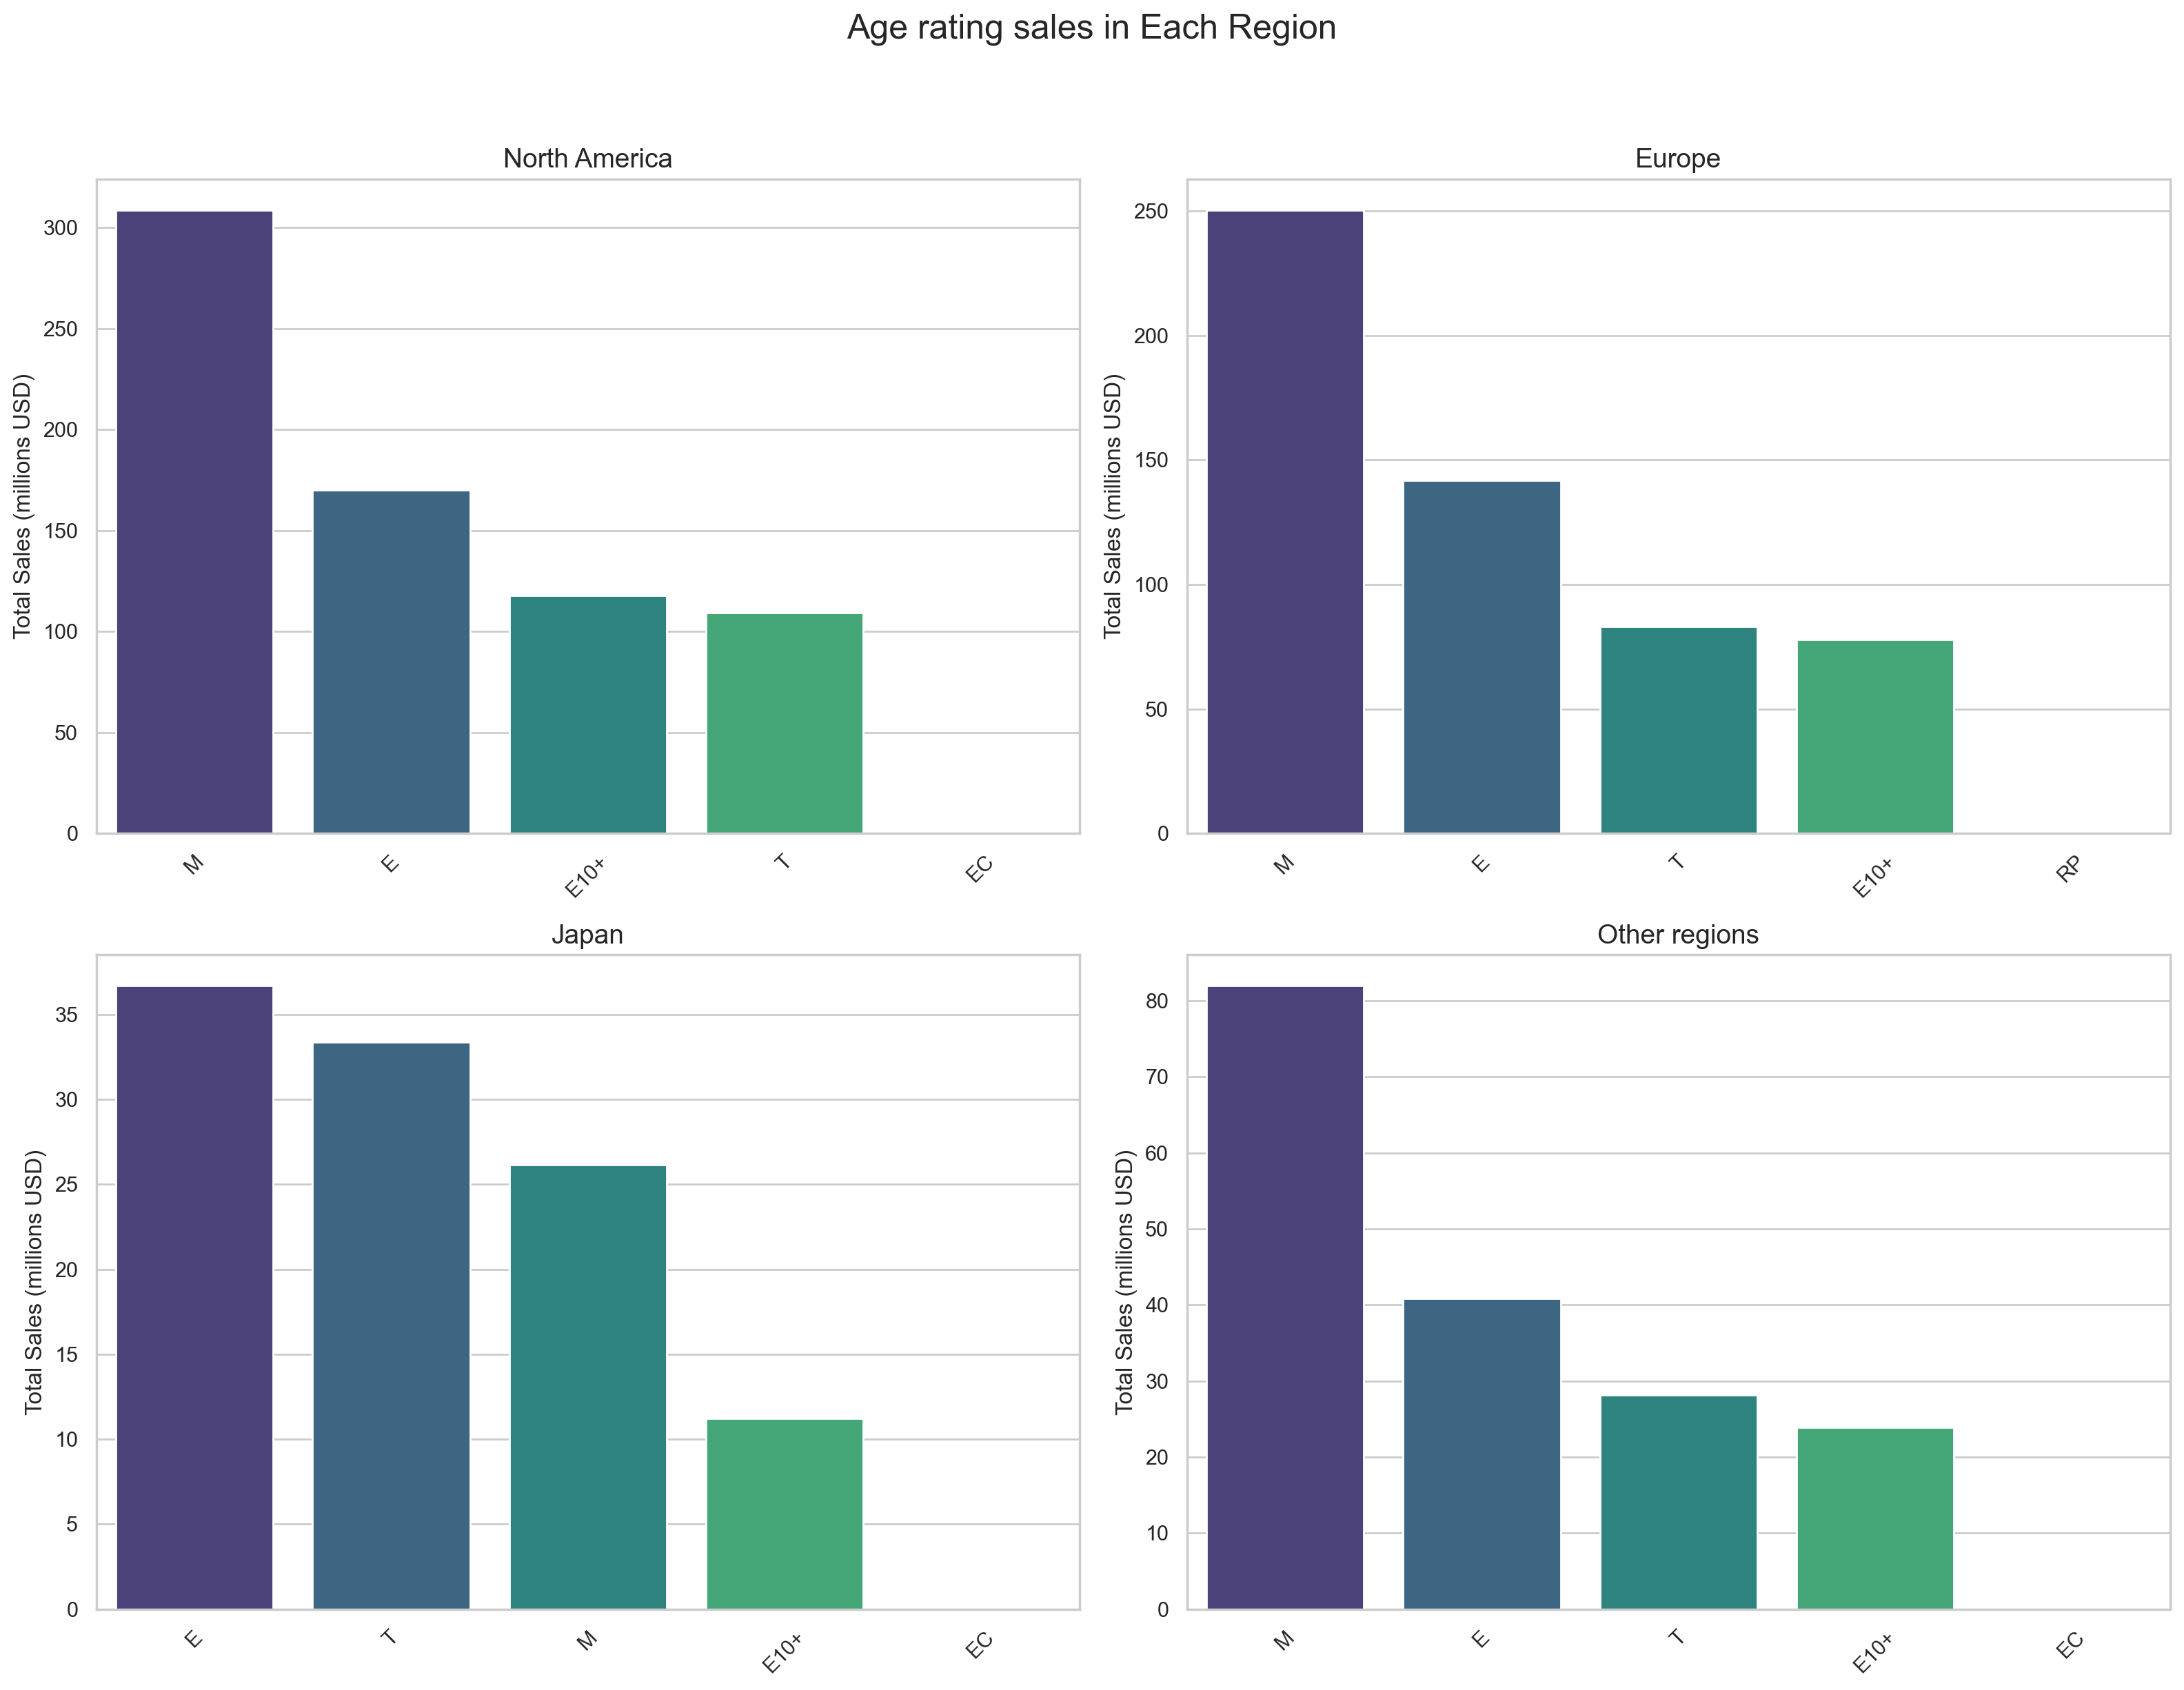

In [46]:
sns.set(style="whitegrid")

regions = {
    'North America': 'na_sales',
    'Europe': 'eu_sales',
    'Japan': 'jp_sales',
    'Other regions': 'other_sales'
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=200)
fig.suptitle('Age rating sales in Each Region', fontsize=18, y=1.02)

for i, (region_label, column_name) in enumerate(regions.items()):
    ax = axes[i // 2, i % 2]

    rating_sales = (
        newest_games
        .groupby('rating')[column_name]
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .reset_index()
    )

    sns.barplot(
        data=rating_sales,
        x='rating',
        y=column_name,
        hue='rating',
        palette='viridis',
        ax=ax
    )

    ax.set_title(region_label, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Total Sales (millions USD)')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

As expected, **in both North America and Europe, the M-rated games lead in sales**. These ratings are typically associated with **action** and **shooter** games, which we’ve already identified as the top-selling genres in these regions. This reinforces the pattern we’ve been seeing: mature audiences in Western markets gravitate toward fast paced action games

On the other hand, **in Japan, the best-selling age rating is E for Everyone**, which aligns with the dominance of the 3DS. Given that many 3DS titles cater to younger or family-friendly audiences, this result makes perfect sense.

This distinction further emphasizes how audience profiles differ greatly by region, and why regional segmentation should always be considered when analyzing global sales and consumer behavior.

---

## Hypothesis testing

Now that I’ve conducted a broad exploratory analysis, it’s time to move into hypothesis testing. The purpose here is to statistically validate some of our insights and evaluate whether there’s a real impact between specific variables I’ve been analyzing.

### First hypothesis: are Xbox One and PC User ratings equal?

To begin, I want to test whether the average user ratings for games released on Xbox One are the same as those for PC games.

Since we are comparing two independent samples, the user ratings for each platform, we'll use a two-sample independent hypothesis test.

**H₀ (Null Hypothesis)**: The mean user rating on Xbox One is equal to the mean user rating on PC.

**H₁ (Alternative Hypothesis)**: The mean user rating on Xbox One is not equal to the mean user rating on PC.

To begin the hypothesis test I'll do the following:

1. Filter the dataset to include only games Xbox One and PC games.
2. Extract the `user_score` values for each group.
3. Apply **Levene's test** to verify if the variances are equal.
4. Based on that result, apply the **Student's t-test** to compare the means.

In [47]:
xone_scores = newest_games.query("platform == 'XOne'")['user_score'].dropna()
pc_scores = newest_games.query("platform == 'PC'")['user_score'].dropna()

alpha = 0.05

levene_stat, levene_p = st.levene(xone_scores, pc_scores)

print(f"Levene’s test p-value: {levene_p:.4f}")
if levene_p < alpha:
    print("Variances are significantly different (reject H₀).")
else:
    print("No evidence to reject equal variances (fail to reject H₀).")

Levene’s test p-value: 0.0192
Variances are significantly different (reject H₀).


Since this value is lower than the chosen significance level of 0.05, let's reject the null hypothesis. This means there is statistical evidence that the variances of user scores on Xbox One and PC are different.

So we can proceed with a standard two-sample t-test assuming different variances.

In [48]:
t_test_result = st.ttest_ind(xone_scores, pc_scores, equal_var=False)
t_statistic = t_test_result.statistic
p_value = t_test_result.pvalue
alpha = 0.05

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject H₀: There is a statistically significant difference in user scores between Xbox One and PC.")
else:
    print("No evidence to reject H₀: We cannot conclude that there is a difference in user scores between Xbox One and PC.")


T-statistic: 0.5061
P-value: 0.6131
No evidence to reject H₀: We cannot conclude that there is a difference in user scores between Xbox One and PC.


Since the null hypothesis could not be rejected, **I cannot conclude that there is a statistically significant difference between user ratings for Xbox One and PC platforms**. In other words, based on the data available, there is no strong evidence that players rate games differently depending on whether they play on Xbox One or PC. This reinforces the idea that both platforms may appeal to a similar audience in terms of user satisfaction.


### Second hypothesis: are Action and Sport genres user ratings different?

Now I want to test a new hypothesis: whether there is a difference in the average user ratings between **Action** and **Sports** games.

- **H₀ (Null Hypothesis):** The mean user ratings for Action and Sports genres are not significantly different.
- **H₁ (Alternative Hypothesis):** The mean user ratings for Action and Sports genres are significantly different.

I’ll follow the same methodology as before:

1. Filter the dataset to include only games from the Action and Sports genres.
2. Extract the `user_score` values for each group.
3. Apply **Levene's test** to verify if the variances are equal.
4. Based on that result, apply the **Student's t-test** to compare the means.


In [49]:
action_scores = newest_games.query("genre == 'Action'")['user_score'].dropna()
sports_scores = newest_games.query("genre == 'Sports'")['user_score'].dropna()

alpha = 0.05

levene_stat, levene_p = st.levene(action_scores, sports_scores)

print(f"Levene’s test p-value: {levene_p:.7f}")
if levene_p < alpha:
    print("Variances are significantly different (reject H₀).")
else:
    print("No evidence to reject equal variances (fail to reject H₀).")

Levene’s test p-value: 0.0000198
Variances are significantly different (reject H₀).


In [50]:
t_test_result_genre = st.ttest_ind(action_scores, sports_scores, equal_var=False)
t_statistic_genre = t_test_result_genre.statistic
p_value_genre = t_test_result_genre.pvalue
alpha = 0.05

print(f"T-statistic: {t_statistic_genre:.4f}")
print(f"P-value: {p_value_genre}") 

if p_value_genre < alpha:
    print("Reject H₀: There is a statistically significant difference in user scores between Action and Sports genres.")
else:
    print("No evidence to reject H₀: We cannot conclude that user scores differ significantly between Action and Sports genres.")

T-statistic: 9.3607
P-value: 8.285648549432564e-19
Reject H₀: There is a statistically significant difference in user scores between Action and Sports genres.


Given the extremely small p-value, we have strong statistical evidence to reject the null hypothesis. This confirms that user ratings for **Action** and **Sports** games differ significantly.

This finding highlights that genre plays a meaningful role in user perception and satisfaction, and should be considered in game design and marketing strategies.

---

## Conclusion

Our analysis of video game data from 2011 onward allowed us to explore several factors that influence game sales across regions, platforms, genres, and age ratings.

Throughout the process:

- We **preprocessed the data** by adjusting formats, standardizing column names, and handling missing values.
- We explored **regional platform preferences**, finding that consumer behavior varies significantly:
  - **Japan** shows a strong preference for local platforms like the 3DS and PS Vita.
  - **Europe** stands out with a notable interest in PC gaming.
  - **North America** aligns closely with the global trend, favoring platforms like Xbox, PlayStation, and Nintendo.
- We evaluated the impact of **user and critic scores** on sales and found a moderate positive correlation (~33%) with critic scores. Still, some games without critic reviews sold well, suggesting that great reviews are important but not the sole driver of success.
- **Age ratings** appears to have a stronger influence in Japan, but further analysis correlated this with the most popular platform there, the Nintendo 3DS, with several family-friendly games.
- Genre analysis revealed **clear regional differences**, with *Role-Playing*, *Fighting*, and *Platform* genres performing better in Japan, while *Action* and *Shooter* dominate Western markets.

We also performed two hypothesis tests:

1. **Xbox One vs PC user scores**: No statistical evidence was found to suggest a difference in average user ratings between the two platforms.
2. **Action vs Sports genres**: A statistically significant difference was found, with Action games generally receiving higher user ratings.

In summary, **regional preferences matter**. Marketing strategies should consider the dominant platforms, genre preferences, and audience characteristics of each region. While global trends offer a broad picture, **targeted decisions based on regional insights** are more likely to drive successful outcomes.

With a dataset focused on newer games, our findings offer valuable perspectives on consumer behavior and potential business directions in the gaming industry.
